# WFP Rwanda Food data Analysis

Data source: https://data.humdata.org/dataset/wfp-food-prices-for-rwanda

# Table of Contents

* [1.Introduction](#1.Introduction)
* [2. Environment set-up](#2.Envronment)
   * [2.1. Import libraries](#2.1.library)
   * [2.2. Import the data set](#2.2.Import)
* [3. Summary of the data](#3.data_summary)
* [4. Exploratory Data Analysis](#4.EDA)
   * [4.1. General data analysis](#4.1.general_analysis)
       * [4.1.1. Number of Price data](#4.1.1.number_of_price)
       * [4.1.2. Price data per Province and City](#4.1.2.Price_data_per_Province_and_City)
       * [4.1.3. Price data per Category and Commodity](#4.1.3.Price_data_per_Category_and_Commodity)
       * [4.1.4. Price data per Province and Commodity](#4.1.4.Price_data_per_Province_and_Commodity)
   * [4.2. Further data analysis](#4.2.Further_data_analysis)
   * [4.3. Time series analysis](#4.3.TSA)
      * [4.3.1.  Creating Year, Month, Date columns](#4.3.1.Creating_YMD_columns)
      * [4.3.2.  Price changes of Potatoes (Irish) by admin1(province)](#4.3.2.Price_changes_of_Potatoes_by_admin1)
      * [ 4.3.3. Preliminary Analysis](#4.3.3.Preliminary)
      * [ 4.3.4. Seasonality Analysis](#4.3.4.Seasonality_Analysis)
   * [4.4. Potatoes (Irish) data distribution](#4.4.Potatoes_data_distribution)
      * [4.4.1. Potatoes (Irish) price distribution by admin1(province)](#4.4.2.Potatoes_price_difference_by_province)
      * [4.4.2. Potatoes (Irish) price distribution by admin1(province)](#4.4.3.Outlier_analysis)
      * [4.4.3. Potatoes (Irish) price distribution by admin1(province)](#4.4.4.Potatoes_price_difference_by_city)
* [5.Conclusion](#4.Conclusion)

## 1. Introduction <a class="anchor" id="1.Introduction"></a>

After the 1994 genocide, Rwanda has recorded significant growth in poverty reduction and food production. However, still, approximately 40% of the population live below the poverty line and 35% of young children are at risk of growth stunt.

The World Food Programme(WFP) in Rwanda is managing multiple projects to achieve Zero Hunger. WFP provides monthly food assistance to 150,000 Congolese and Burundian refugees in Rwanda, supports rural communities to build infrastructure, and help smallholder farmers to gain access to the regional market and financial services.


This data analysis use monthly food price data in Rwanda to understand the food price changes in Rwanda from 2000 to 2022.

## 2. Environment set-up <a class="anchor" id="2.Environment"></a>

### 2.1. Import libraries<a class="anchor" id="2.1.library"></a>

In [366]:
library(readr)
library(dplyr)
library(tidyverse) 
library(knitr)
library(repr)
library(gridExtra)
library(ggthemes)
library(data.table)
library(lubridate)
library(fpp2)
library(ggfortify)
library(treemap)
library(lubridate)

### 2.2. Import the data set<a class="anchor" id="2.2.Import"></a>

The following data records monthly price changes in agriculture commodities in Rwanda from January 15th, 2000 to Feburary 15th 2022.

In [367]:
rwanda_commodity <- read.csv("C:/Users/user/Desktop/data_analysis/WFP Rwanda/wfp_food_prices_rwa.csv")
#Data source: https://data.humdata.org/dataset/wfp-food-prices-for-rwanda

*The path needs to be changed according to the location of the data file.

## 3. Summary of the data<a class="anchor" id="3.data_summary"></a>

In [368]:
head(rwanda_commodity)

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
1,2000-01-15,Kigali City,Nyarugenge,Kigali,-1.953611,30.06056,cereals and tubers,Maize,KG,actual,Wholesale,RWF,206.11,0.2023
2,2000-01-15,Kigali City,Nyarugenge,Kigali,-1.953611,30.06056,pulses and nuts,Beans,KG,actual,Wholesale,RWF,108.02,0.1060
3,2000-02-15,Kigali City,Nyarugenge,Kigali,-1.953611,30.06056,cereals and tubers,Maize,KG,actual,Wholesale,RWF,152.66,0.1499
4,2000-02-15,Kigali City,Nyarugenge,Kigali,-1.953611,30.06056,pulses and nuts,Beans,KG,actual,Wholesale,RWF,110.22,0.1082
5,2000-03-15,Kigali City,Nyarugenge,Kigali,-1.953611,30.06056,cereals and tubers,Maize,KG,actual,Wholesale,RWF,159.27,0.1563
6,2000-03-15,Kigali City,Nyarugenge,Kigali,-1.953611,30.06056,pulses and nuts,Beans,KG,actual,Wholesale,RWF,110.22,0.1082


In [369]:
sapply(rwanda_commodity, function(x) length(unique(x)))

date    admin1    admin2    market  latitude longitude  category commodity 
      241         5        29       105       102       102         8        65 
     unit priceflag pricetype  currency     price  usdprice 
        4         2         2         1     18005     12988

In [370]:
str(rwanda_commodity)

'data.frame':	137554 obs. of  14 variables:
 $ date     : Factor w/ 241 levels "2000-01-15","2000-02-15",..: 1 1 2 2 3 3 4 4 5 5 ...
 $ admin1   : Factor w/ 5 levels "Eastern Province",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ admin2   : Factor w/ 29 levels "Administrative unit not available",..: 22 22 22 22 22 22 22 22 22 22 ...
 $ market   : Factor w/ 105 levels "Base","Batiment",..: 42 42 42 42 42 42 42 42 42 42 ...
 $ latitude : num  -1.95 -1.95 -1.95 -1.95 -1.95 ...
 $ longitude: num  30.1 30.1 30.1 30.1 30.1 ...
 $ category : Factor w/ 8 levels "cereals and tubers",..: 1 7 1 7 1 7 1 7 1 7 ...
 $ commodity: Factor w/ 65 levels "Apples (red)",..: 28 4 28 4 28 4 28 4 28 4 ...
 $ unit     : Factor w/ 4 levels "KG","L","Sack",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ priceflag: Factor w/ 2 levels "actual","aggregate": 1 1 1 1 1 1 1 1 1 1 ...
 $ pricetype: Factor w/ 2 levels "Retail","Wholesale": 2 2 2 2 2 2 2 2 2 2 ...
 $ currency : Factor w/ 1 level "RWF": 1 1 1 1 1 1 1 1 1 1 ...
 $ price    : num  206 10

In [371]:
summary(rwanda_commodity)

         date                      admin1             admin2     
 2015-05-15:  2437   Eastern Province :29801   Gicumbi   :11929  
 2015-06-15:  2415   Kigali City      :11829   Gakenke   :10214  
 2015-07-15:  2378   Northern Province:34743   Huye      : 9752  
 2015-04-15:  2340   Southern Province:31268   Nyarugenge: 8158  
 2015-08-15:  2321   Western Province :29913   Nyamagabe : 7839  
 2015-09-15:  2320                             Gatsibo   : 7601  
 (Other)   :123343                             (Other)   :82061  
        market          latitude        longitude    
 Nyakarambi:  2958   Min.   :-2.742   Min.   :28.90  
 Gasarenda :  2928   1st Qu.:-2.316   1st Qu.:29.55  
 Byumba    :  2787   Median :-1.954   Median :29.85  
 Kibirizi  :  2768   Mean   :-1.991   Mean   :29.85  
 Nyabugogo :  2605   3rd Qu.:-1.645   3rd Qu.:30.10  
 Musanze   :  2527   Max.   :-1.114   Max.   :30.84  
 (Other)   :120981                                   
                  category              

##### Findings:

1. There is **no Null data**

2. Kigali city has relatively low number of data compare to other provinces.

3. There are price data for **65 different commmodities**, in **5 provinces**, in **29 different cities**, and in **105 different markets**. 

4. **'Potatoes(Irish)', 'Beans(dry)', 'Cassava flour', 'Maize flour' are the top 4 commodities with the most data.** Since important commodities are more likely to get documented than less important commodities, I assume that **they are the most important, thus the staple food in Rwanda.**

5. Minimal value and maximum value of 'price' are dramatically different; need to check whether there are outliers.

## 4. Exploratory Data Analysis<a class="anchor" id="4.EDA"></a>

### 4.1. General data analysis<a class="anchor" id="4.1.general_analysis"></a>

Let's explore more details of the Rwanda commodity.


Let’s represent all provinces(admin1) and categories, and top 20 for cities(admin2) and commodities by number of price data.

#### 4.1.1. Number of Price data<a class="anchor" id="4.1.1.number_of_price"></a>

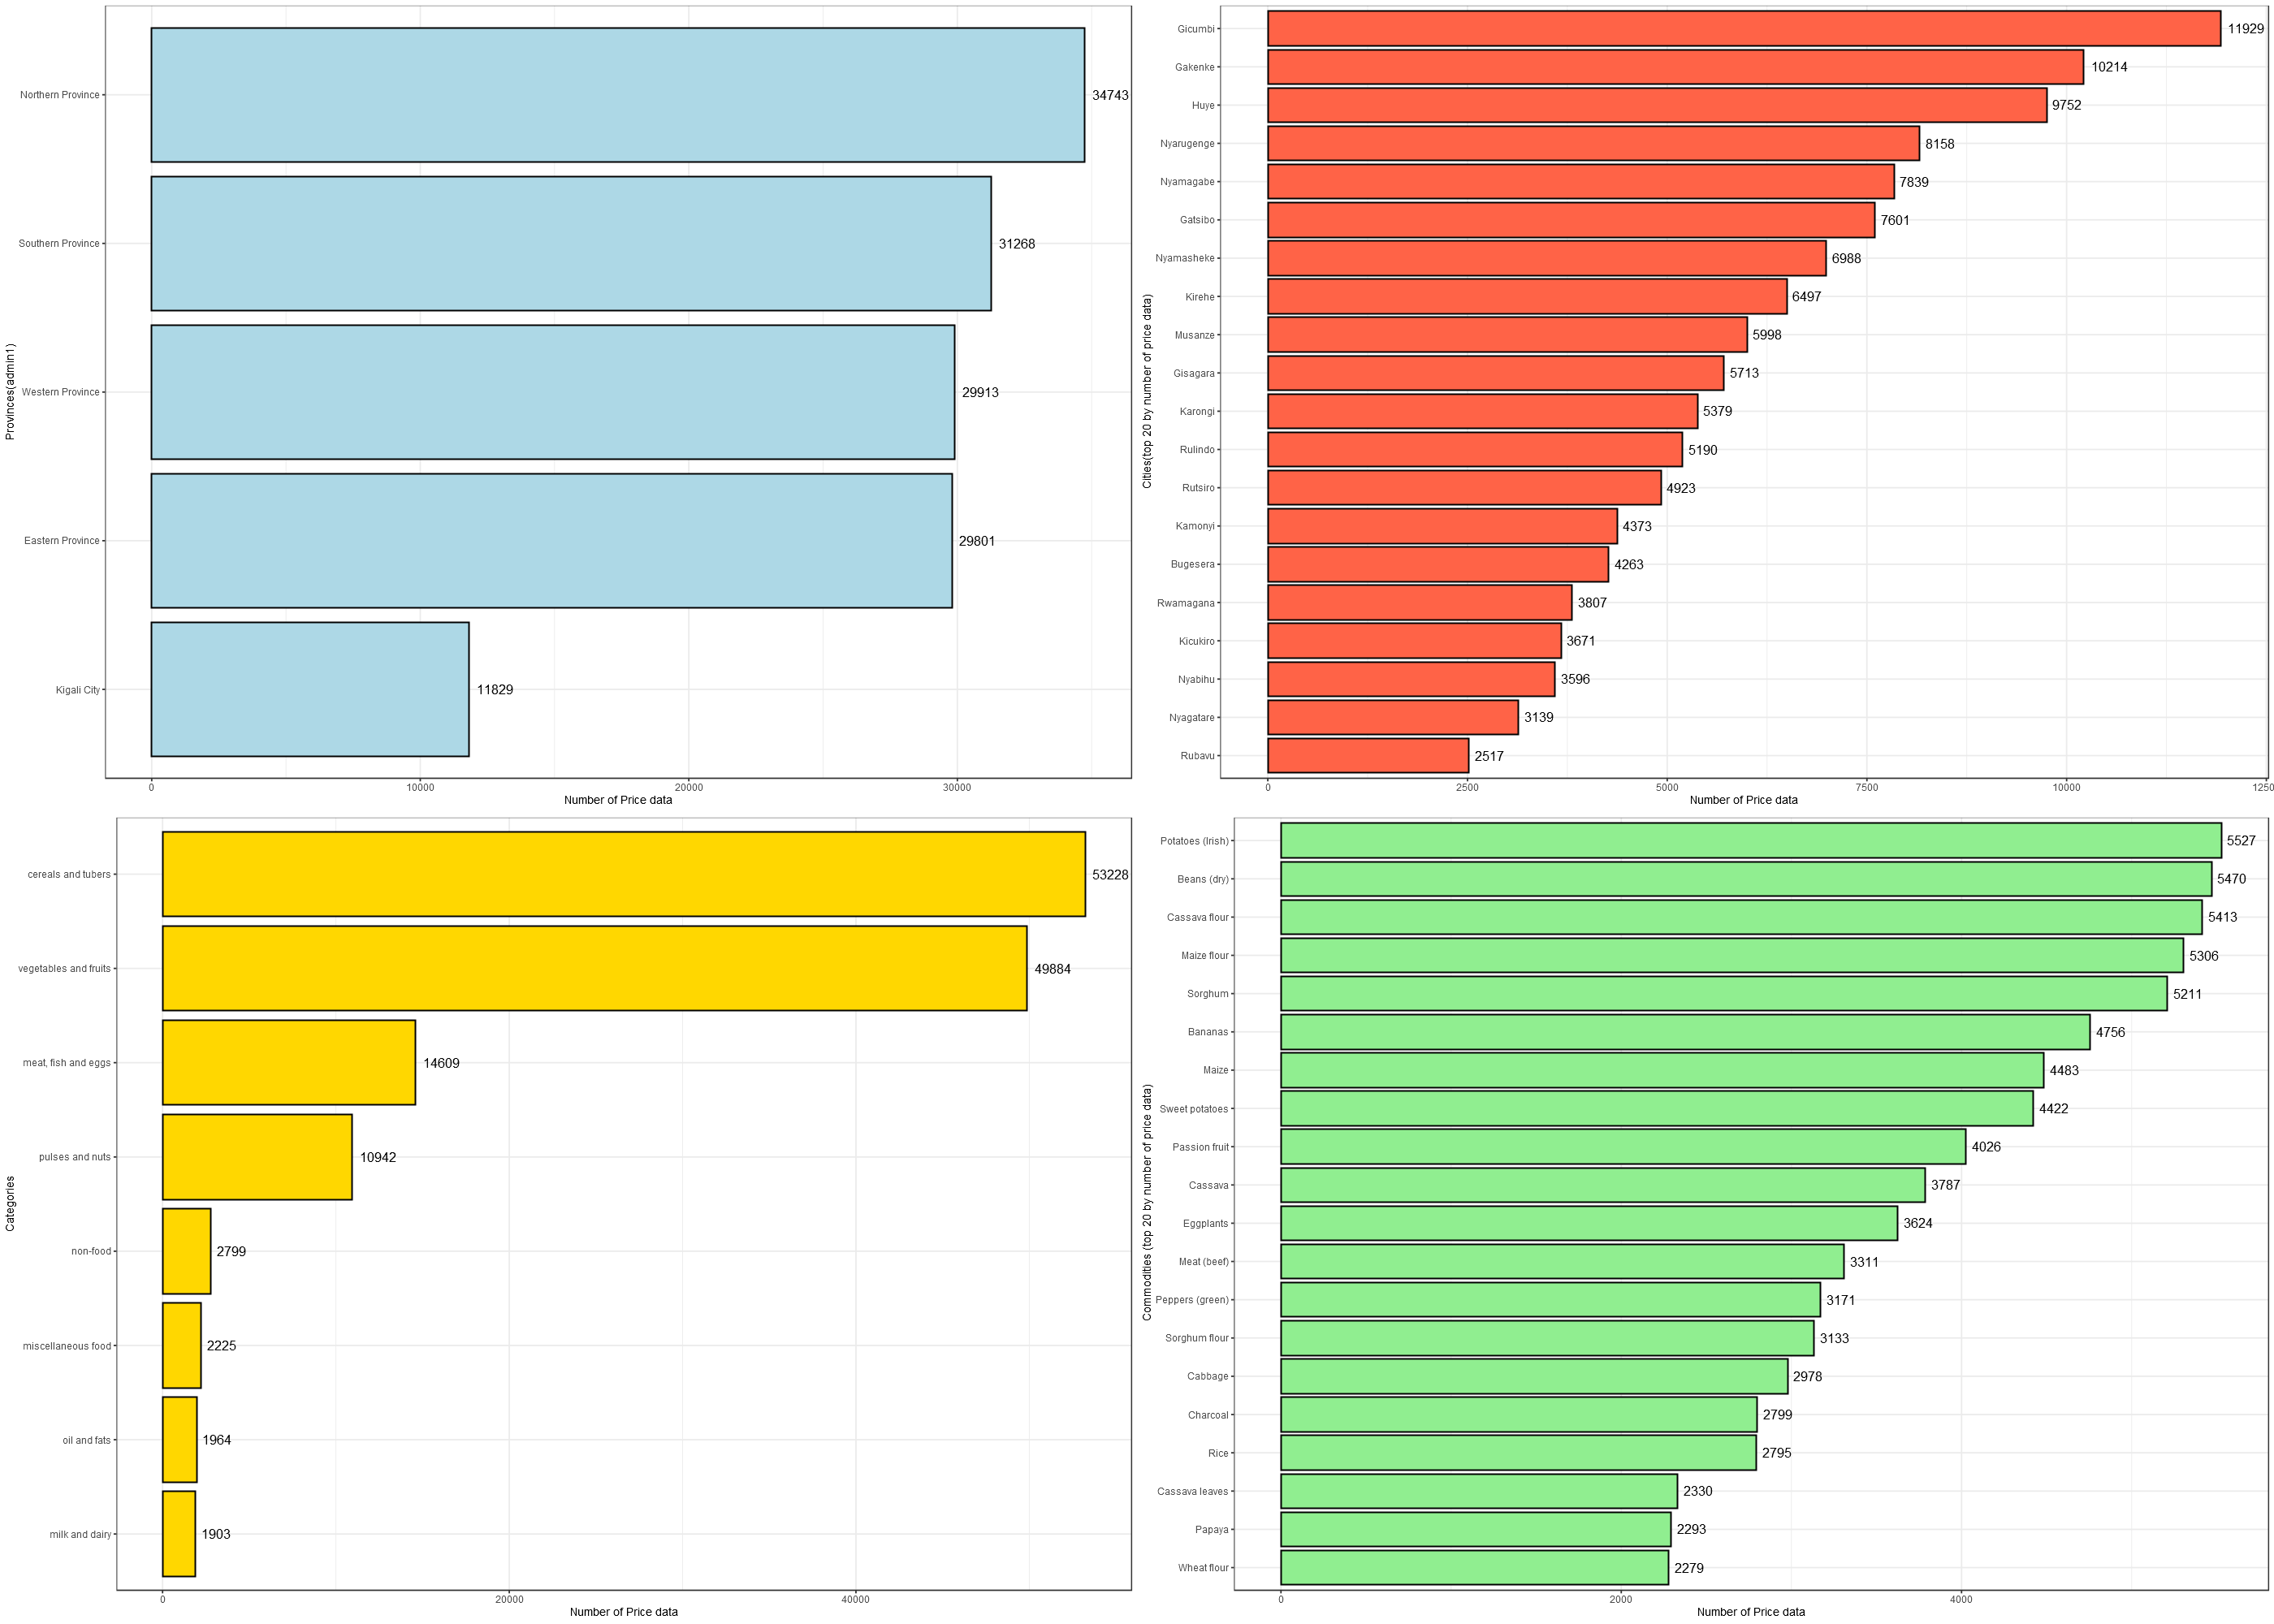

In [372]:
rwanda_commodity %>% group_by(admin1) %>% summarise(nr = length(price)) %>% 
ungroup() %>%
  ggplot(aes(x = reorder(admin1,nr), y = nr)) +
  geom_bar(stat="identity", fill="lightblue", colour="black") +
  geom_text(aes(label=nr), hjust=-0.2, position=position_dodge(width=0.6)) +
  coord_flip() + theme_bw(base_size = 10)  +
  labs(x ="Provinces(admin1)", y = "Number of Price data") -> d1


rwanda_commodity %>% group_by(admin2) %>% summarise(nr = length(price)) %>% 
top_n(20,wt=nr) %>% ungroup() %>%
  ggplot(aes(x = reorder(admin2,nr), y = nr)) +
  geom_bar(stat="identity", fill="tomato", colour="black") +
  geom_text(aes(label=nr), hjust=-0.2, position=position_dodge(width=0.6)) +
  coord_flip() + theme_bw(base_size = 10)  +
  labs(x ="Cities(top 20 by number of price data)", y = "Number of Price data")-> d2

rwanda_commodity %>% group_by(category) %>% summarise(nr = length(price)) %>% ungroup() %>%
  ggplot(aes(x = reorder(category,nr), y = nr)) +
  geom_bar(stat="identity", fill="gold", colour="black") +
  geom_text(aes(label=nr), hjust=-0.2, position=position_dodge(width=0.6)) +
  coord_flip() + theme_bw(base_size = 10)  +
  labs(x ="Categories", y = "Number of Price data")-> d3

rwanda_commodity %>% group_by(commodity) %>% summarise(nr = length(price)) %>% 
top_n(20,wt=nr) %>% ungroup() %>%
  ggplot(aes(x = reorder(commodity,nr), y = nr)) +
  geom_bar(stat="identity", fill="lightgreen", colour="black") +
  geom_text(aes(label=nr), hjust=-0.2, position=position_dodge(width=0.6)) +
  coord_flip() + theme_bw(base_size = 10)  +
  labs(x ="Commodities (top 20 by number of price data)", y = "Number of Price data")-> d4

grid.arrange(d1, d2, d3, d4, ncol=2)

1. All 4 provinces have price data of around 300,000. Cities with the most price data are Gicumbi and Gakenke(both with over 10,000 data).


2. Most price data are recorded under either "cereals and tubers" or "vegetables and fruits" categories. The top 5 commodities that have over 5,000 price data belong to the "cereals and tubers" category.

#### 4.1.2. Price data per Province and City<a class="anchor" id="4.1.2.Price_data_per_Province_and_City"></a>

Let’s represent the number of price data aggregated per province and city, as a treemap.

`summarise()` has grouped output by 'admin1'. You can override using the `.groups` argument.



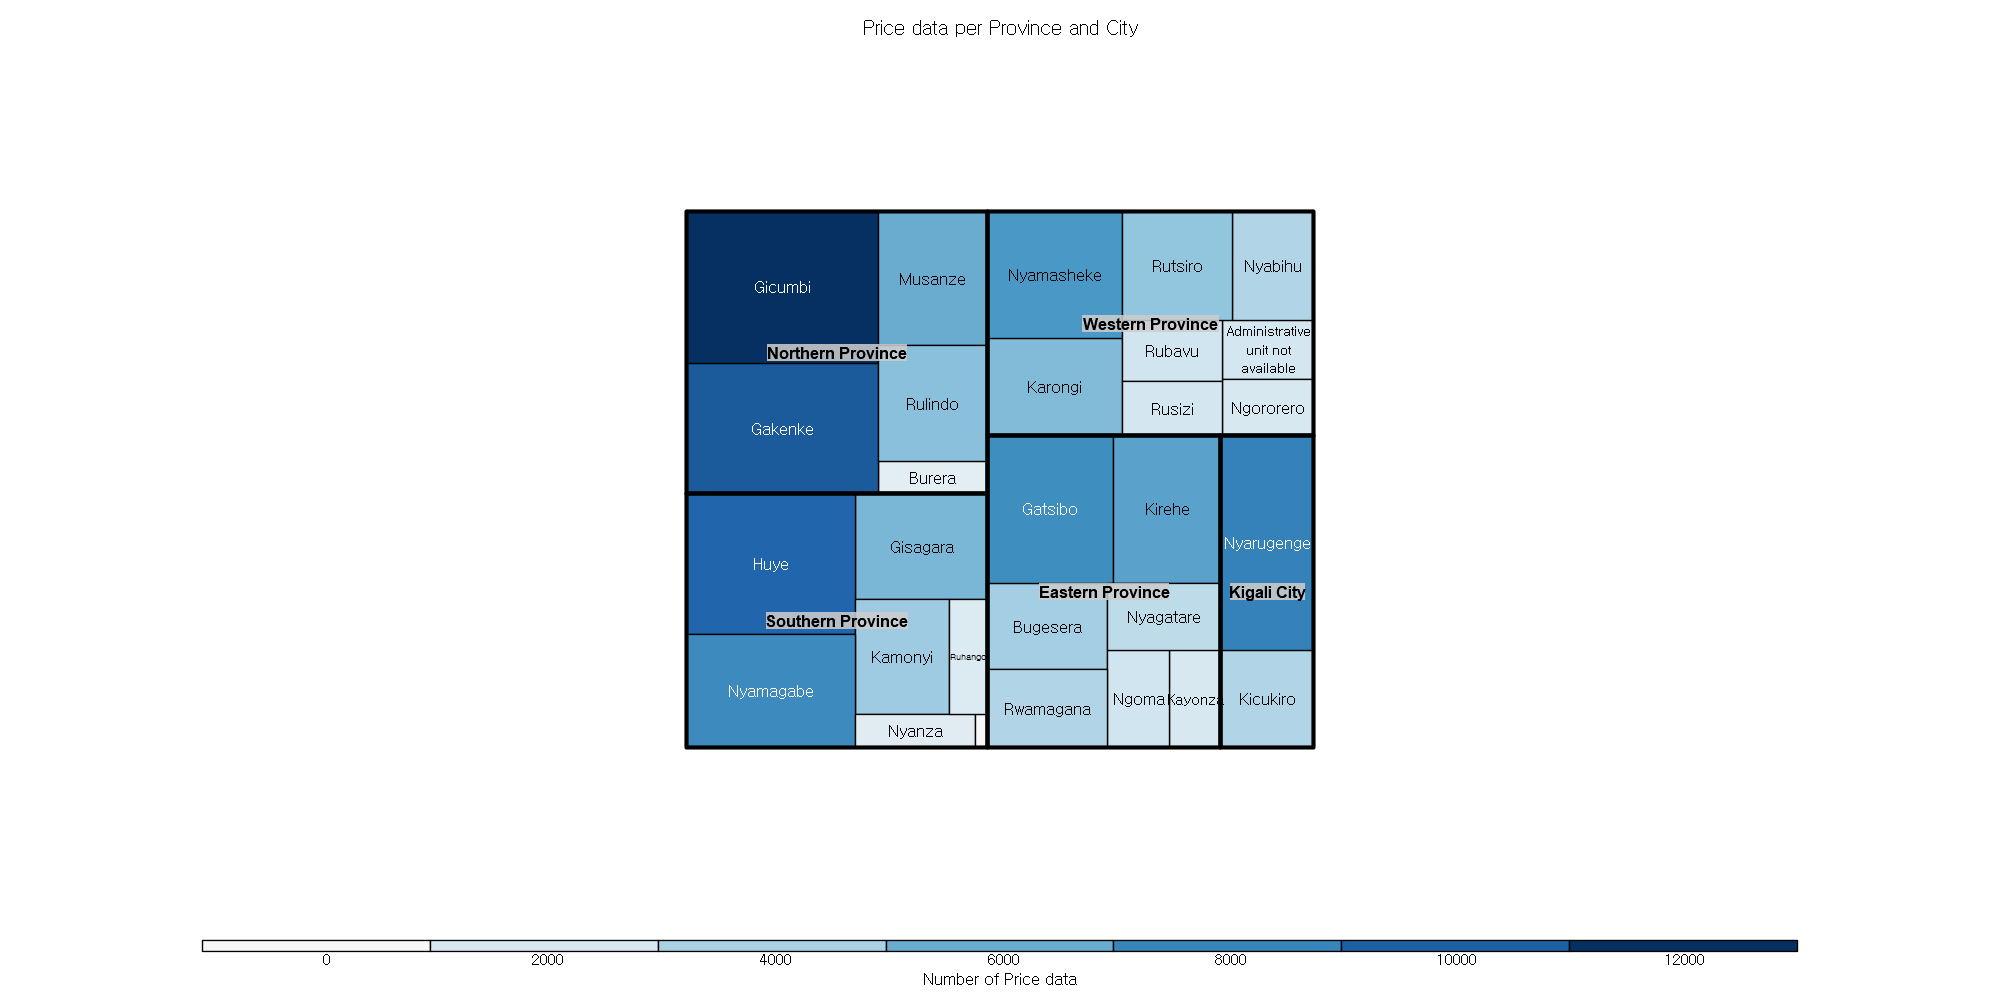

In [410]:
rwanda_commodity %>% group_by(admin1, admin2) %>% summarise(nr = length(price)) %>% top_n(100,wt=nr) %>% ungroup() %>%

 treemap(

        index=c("admin1","admin2"), 

        type="value",

        vSize = "nr",  

        vColor = "nr",

        palette = "RdBu",  

        title=sprintf("Price data per Province and City"), 

        title.legend = "Number of Price data")
options(repr.plot.width=20, repr.plot.height=10)

We can see that apart from Kigali city, most provinces have simialr number of price data. The lack of price data in Kigali City is probably because of the low number of cities it includes(it only includes 2 cities).

#### 4.1.3. Price data per Category and Commodity<a class="anchor" id="4.1.3.Price_data_per_Category_and_Commodity"></a>

Let's represent the treemap for the categories and commodities, showing the size and color of tiles proportional with the number of price data.

`summarise()` has grouped output by 'category'. You can override using the `.groups` argument.



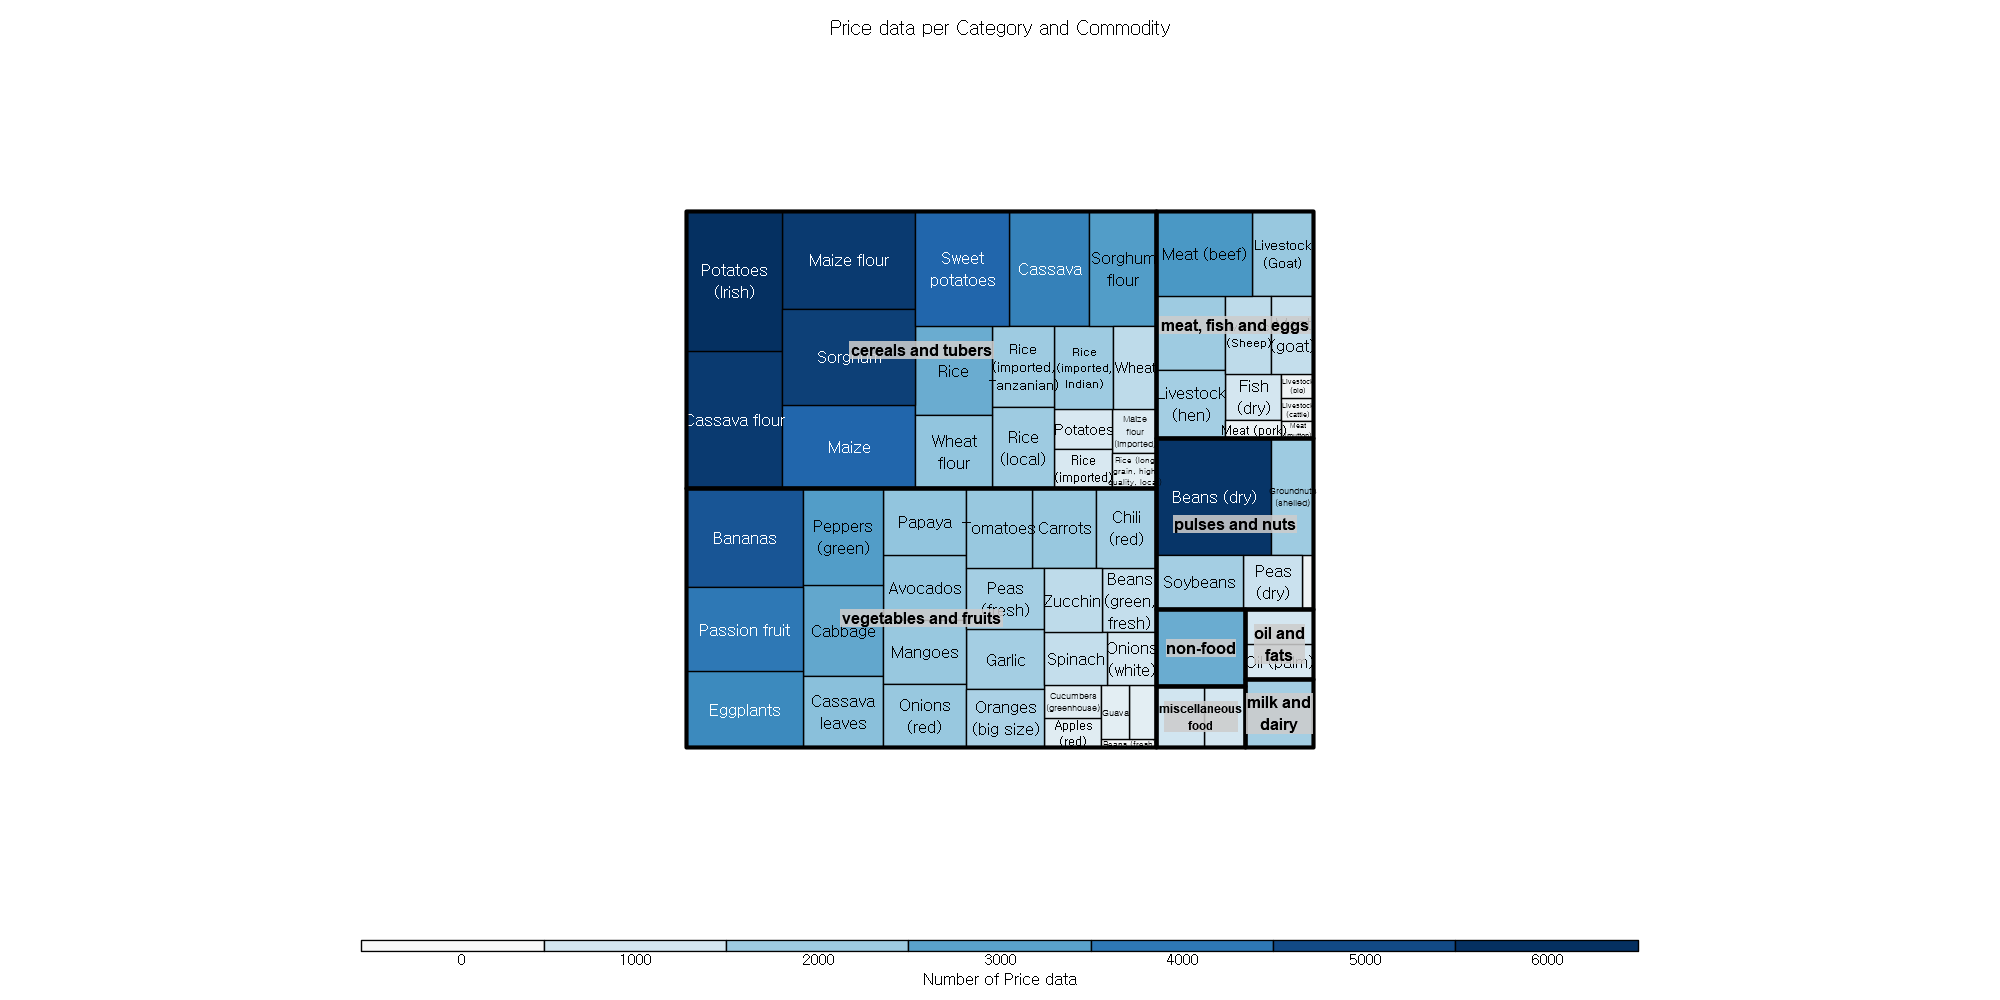

In [398]:
rwanda_commodity %>% group_by(category, commodity) %>% summarise(nr = length(price)) %>% ungroup() %>%

 treemap(

        index=c("category","commodity"), 

        type="value",

        vSize = "nr",  

        vColor = "nr",

        palette = "RdBu",  

        title=sprintf("Price data per Category and Commodity"), 

        title.legend = "Number of Price data")


This treemap is picturing the image of what Rwandan people eat or trade most often.

They mostly eat Cereals and Tubers (potatoes, cassava flour, Maize flour), Vegetable and fruits (bananas, passion fruit, eggplants), and Beans.

We can infer from the graph that the consumption of other commodities such as meat, nuts, and dairy is limited.

#### 4.1.4. Price data per Province and Commodity<a class="anchor" id="4.1.4.Price_data_per_Province_and_Commodity"></a>

Now let's represent the treemap for the province and commodity, showing the size and color of tiles proportional with the number of price data. Through the graph, I would be able to know whether different provinces have different eating habits.

`summarise()` has grouped output by 'admin1'. You can override using the `.groups` argument.



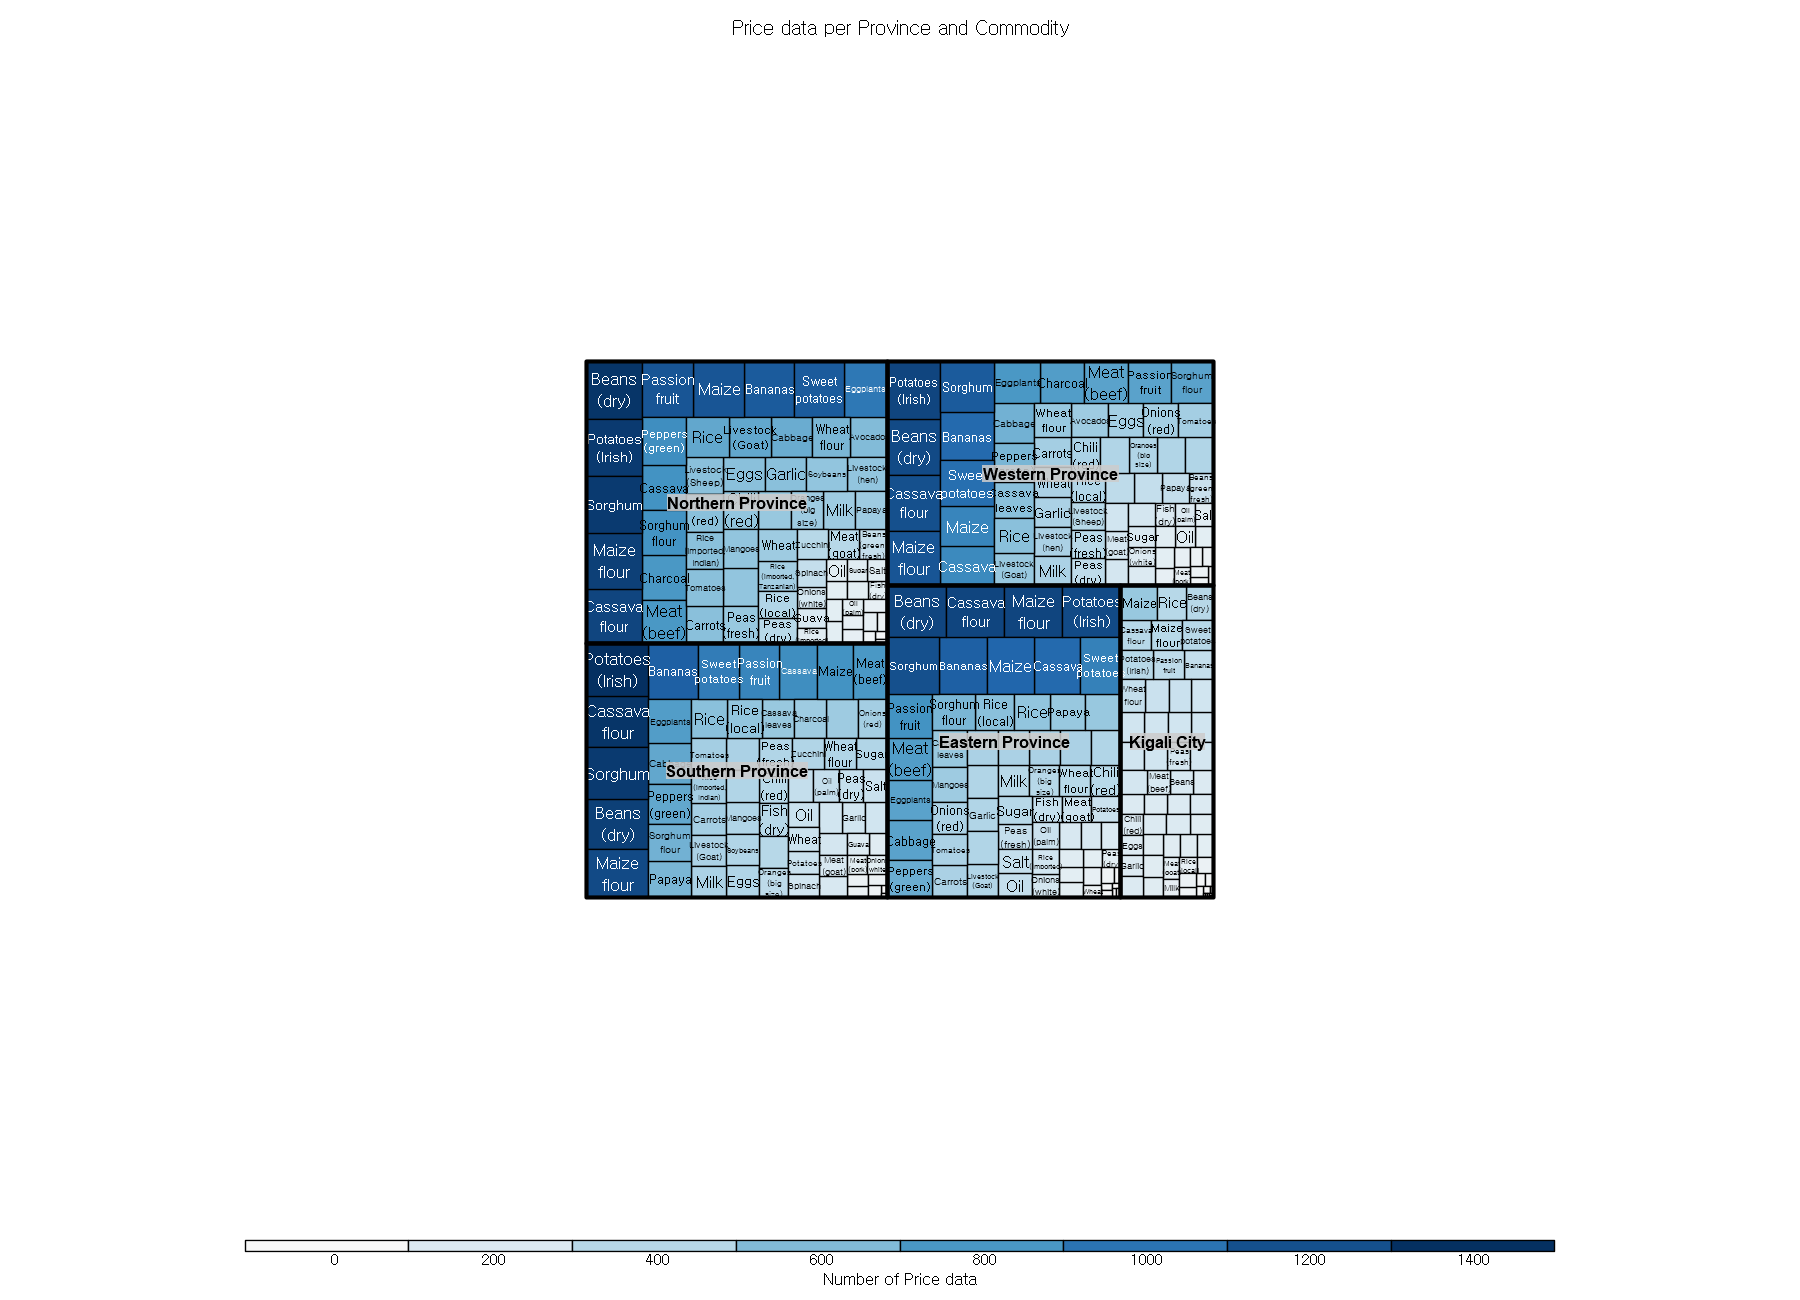

In [415]:
rwanda_commodity %>% group_by(admin1, commodity) %>% summarise(nr = length(price)) %>% ungroup() %>%

 treemap(

        index=c("admin1","commodity"), 

        type="value",

        vSize = "nr",  

        vColor = "nr",

        palette = "RdBu",  

        title=sprintf("Price data per Province and Commodity"), 

        title.legend = "Number of Price data")

There aren't much different in eating habits between provinces. Cereals and Tubers (potatoes, cassava flour, Maize flour) are primary food in all provinces of Rwanda.

### 4.2. Further data analysis<a class="anchor" id="4.2.Further_data_analysis"></a>

Having too many columns could lead to a vague graph; therefore, I will find the most-well documented commodity and use the data to engage in further data analysis. 

I assume that the most well-documented commodity is the primary staple commodity in Rwanda.

And from the above graphs, I could see that "Potatoes (Irish)" is the most-well documented commodity in all regions.

In [416]:
rwanda_commodity_table <- table(rwanda_commodity$commodity)
#To sort the commodity in descbending order, I used rev() function.
rev(sort(rwanda_commodity_table))


                      Potatoes (Irish)                            Beans (dry) 
                                  5527                                   5470 
                         Cassava flour                            Maize flour 
                                  5413                                   5306 
                               Sorghum                                Bananas 
                                  5211                                   4756 
                                 Maize                         Sweet potatoes 
                                  4483                                   4422 
                         Passion fruit                                Cassava 
                                  4026                                   3787 
                             Eggplants                            Meat (beef) 
                                  3624                                   3311 
                       Peppers (green)             

Now we are re-confirmed that 'Potatoes (Irish)' is the most well-documented commodity.

Since it is most likely to be the primary staple commodity in Rwanda, I will use Potatoes (Irish) data to engage in time series analysis for commodities trends.

### 4.3. Time series analysis<a class="anchor" id="4.3.TSA"></a>

#### 4.3.1. Creating Year, Month, Date columns<a class="anchor" id="4.3.1.Creating_YMD_columns"></a>

The data is provided from 2000 till 2022. Since I will be performing time series analysis, I will create year, month, and day columns.

In [417]:
# Divide the 'date' column into 'year', 'month', and 'day'
rwanda_commodity_date_sorted <- rwanda_commodity %>%
    mutate(year = year(date),
    month = month(date),
    day = day(date))
# If I use the above data, only either month or year data will be reflected on the x-axis. 
# Since I want both 'month' and 'year' to be reflectedd I will join month and year data.
rwanda_commodity_date_cleaned <- rwanda_commodity_date_sorted %>%
    mutate(date = ymd(paste(year, month, day))) %>%
    select(-month, -year)

Warning message:
"tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate."
Warning message:
"tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate."
Warning message:
"tz(): Don't know how to compute timezone for object of class factor; returning "UTC". This warning will become an error in the next major version of lubridate."


#### 4.3.2. Price changes of Potatoes (Irish) by admin1(province)<a class="anchor" id="4.3.2.Price_changes_of_Potatoes_by_admin1"></a>

First, I will analyze the trend of 'Potatoes (Irish)' prices from 2000 to 2022 in different provinces.

In [418]:
#FI will group the Potato data.
potato <- rwanda_commodity_date_cleaned[which(rwanda_commodity_date_cleaned$commodity=='Potatoes (Irish)'),]
#And I will re-group the Potato data by date and admin1(Province).
potato_average_price_by_province = potato %>% 
    group_by(date,admin1) %>% 
    select(date, admin1,price) %>%
#Calculate the average price of Potatoes(Irish).
    summarise(averagePrice = mean(price))

`summarise()` has grouped output by 'date'. You can override using the `.groups` argument.



In [419]:
glimpse(potato_average_price_by_province)
#I can see that the dataset includes'date', 'admin1', 'averagePrice.'

Rows: 733
Columns: 3
Groups: date [161]
$ date         <date> 2008-01-15, 2008-01-15, 2008-01-15, 2008-01-15, 2008-01-~
$ admin1       <fct> Eastern Province, Kigali City, Northern Province, Souther~
$ averagePrice <dbl> 102.18750, 100.00000, 84.10000, 107.67857, 99.86111, 99.5~


Now let's use the line graph to see how the potato prices in different provinces have changed over time.

`geom_smooth()` using formula 'y ~ x'



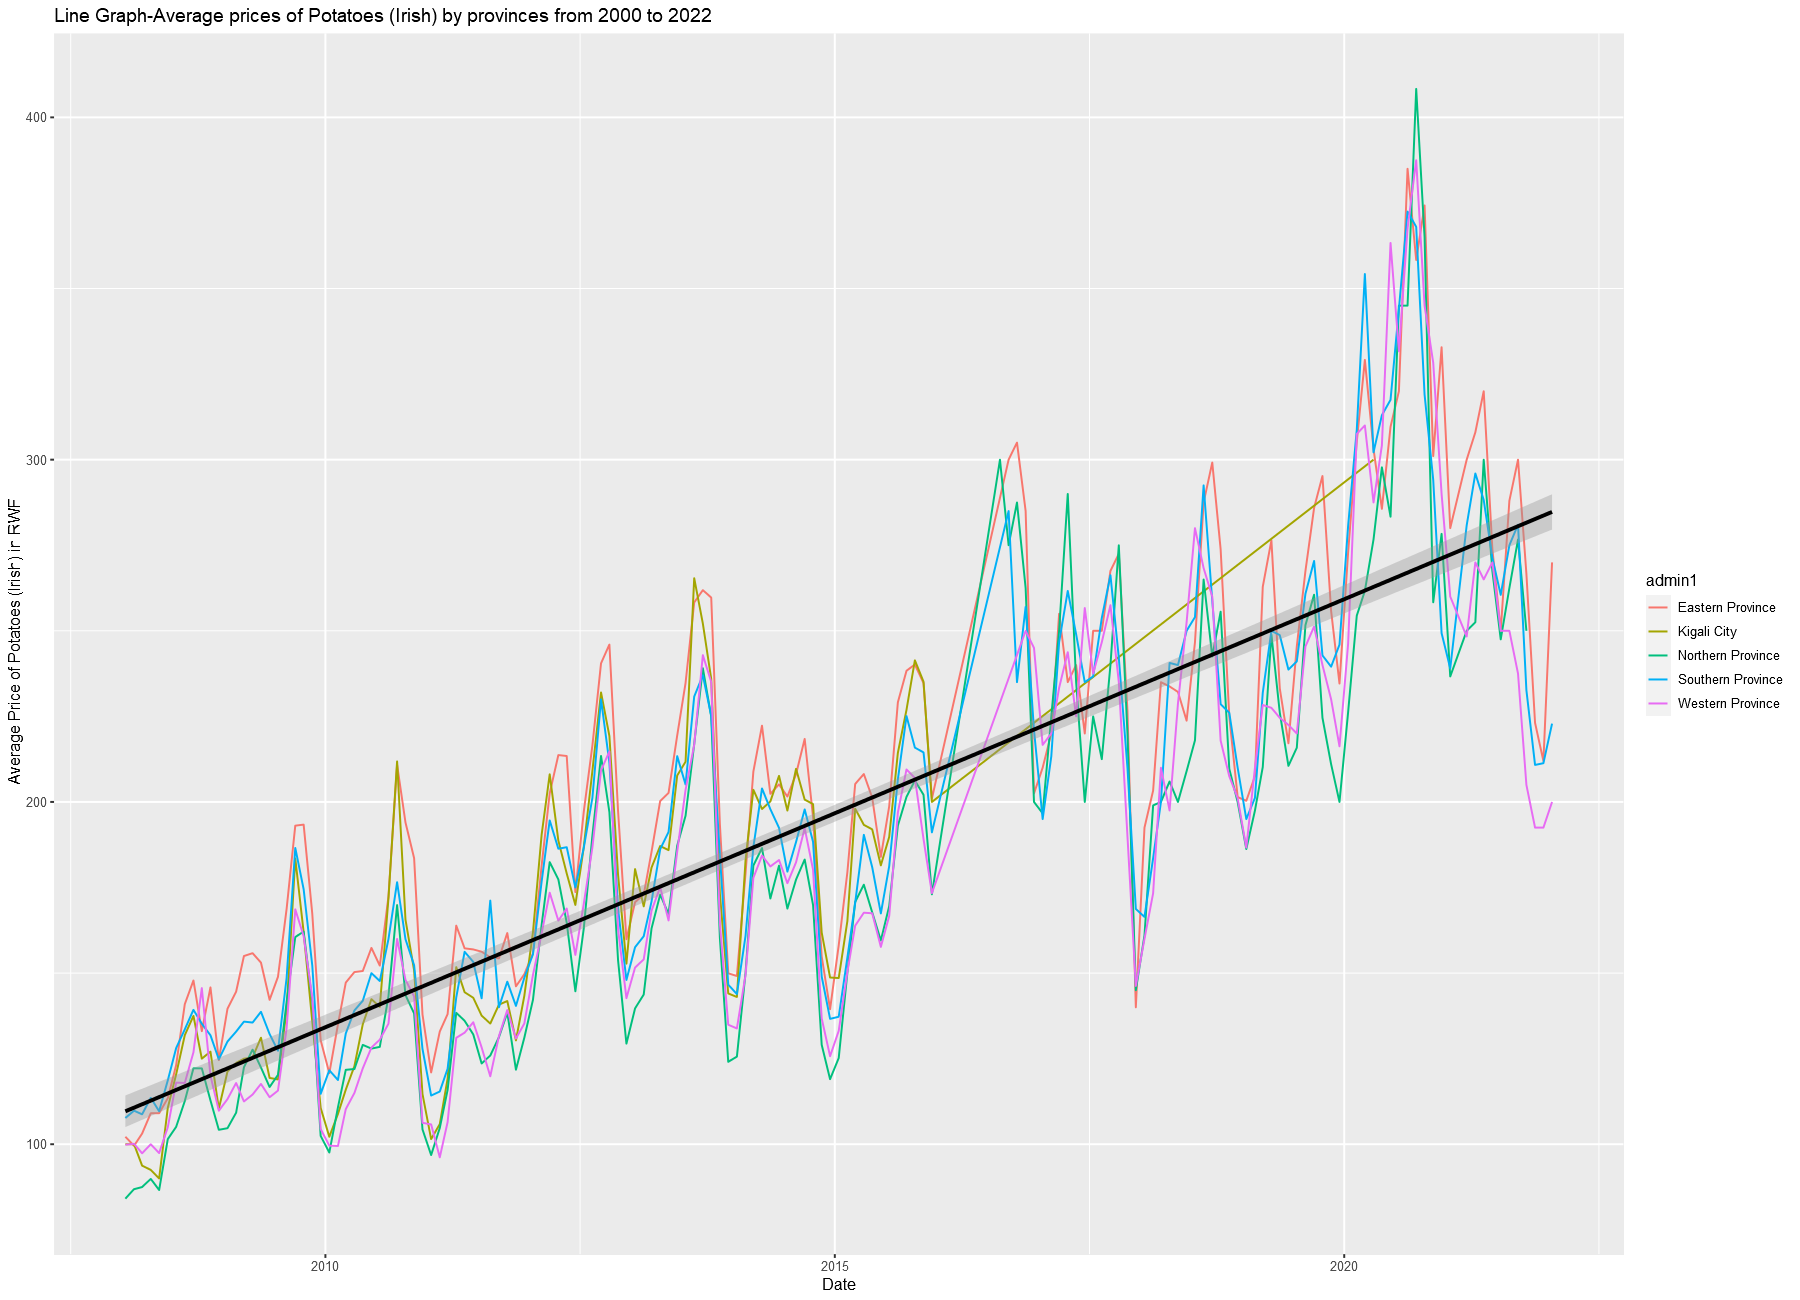

In [420]:
ggplot(data=potato_average_price_by_province,aes(x=date, y=averagePrice, colour=admin1,group = admin1)) +
    labs(colour = "admin1", x = "Date", y ="Average Price of Potatoes (Irish) in RWF", title = "Line Graph-Average prices of Potatoes (Irish) by provinces from 2000 to 2022")+
    geom_line()+ geom_smooth(method = "lm", color="black", aes(group=1))
options(repr.plot.width = 18, repr.plot.height = 13)

#### Findings:

1. In all 5 provinces, potato prices have increased by 200 to 300% from 2000 to 2022.


2. The prices are highly influenced by seasonality. The prices are generally low around winter(December and January), and peak around summer(August). Some years also show a second peak around April or May. Therefore, we can deduct that the potato prices are heavily affected by seasons, and harvest usually occurs in summer.


3. The prices dramatically increased in 2020 and plummeted in 2022. Probably because the supply chain and inflation rate affected by COVID during the period have increased price volatility.


4. There isn't much difference in prices between regions. This implies that the road infrastructure between provinces is well-established, allowing the active flow of logistics while preventing the price discrepancy between regions.

According to the above data, Potato prices seem to be heavily affected by seasonality. If so, how could we analyze the influence of different seasons? In this section, I will conduct Time Series Analysis.


Since potato prices in different regions of Rwanda showed a similar trend, I will use the **mean()** function to get the average price of potatoes(Irish) in Rwanda from 2000 to 2022.

In [382]:
potato_average_price_in_all_province = potato_average_price_by_province %>% 
  group_by(date) %>% 
  select(date, averagePrice) %>%
  summarise(average_Price_of_Potatoes_in_Rwanda = mean(averagePrice))
#I will declare the data as time series data using "ts()" function.
potato_timeseries_data<- ts(potato_average_price_in_all_province[ , 2], start=c(2008), frequency=12)

#### 4.3.3 Preliminary Analysis<a class="anchor" id="4.3.3.Preliminary"></a>

Let's look at the time plot of how the average potato prices in Rwanda have changed from 2008 to 2022.

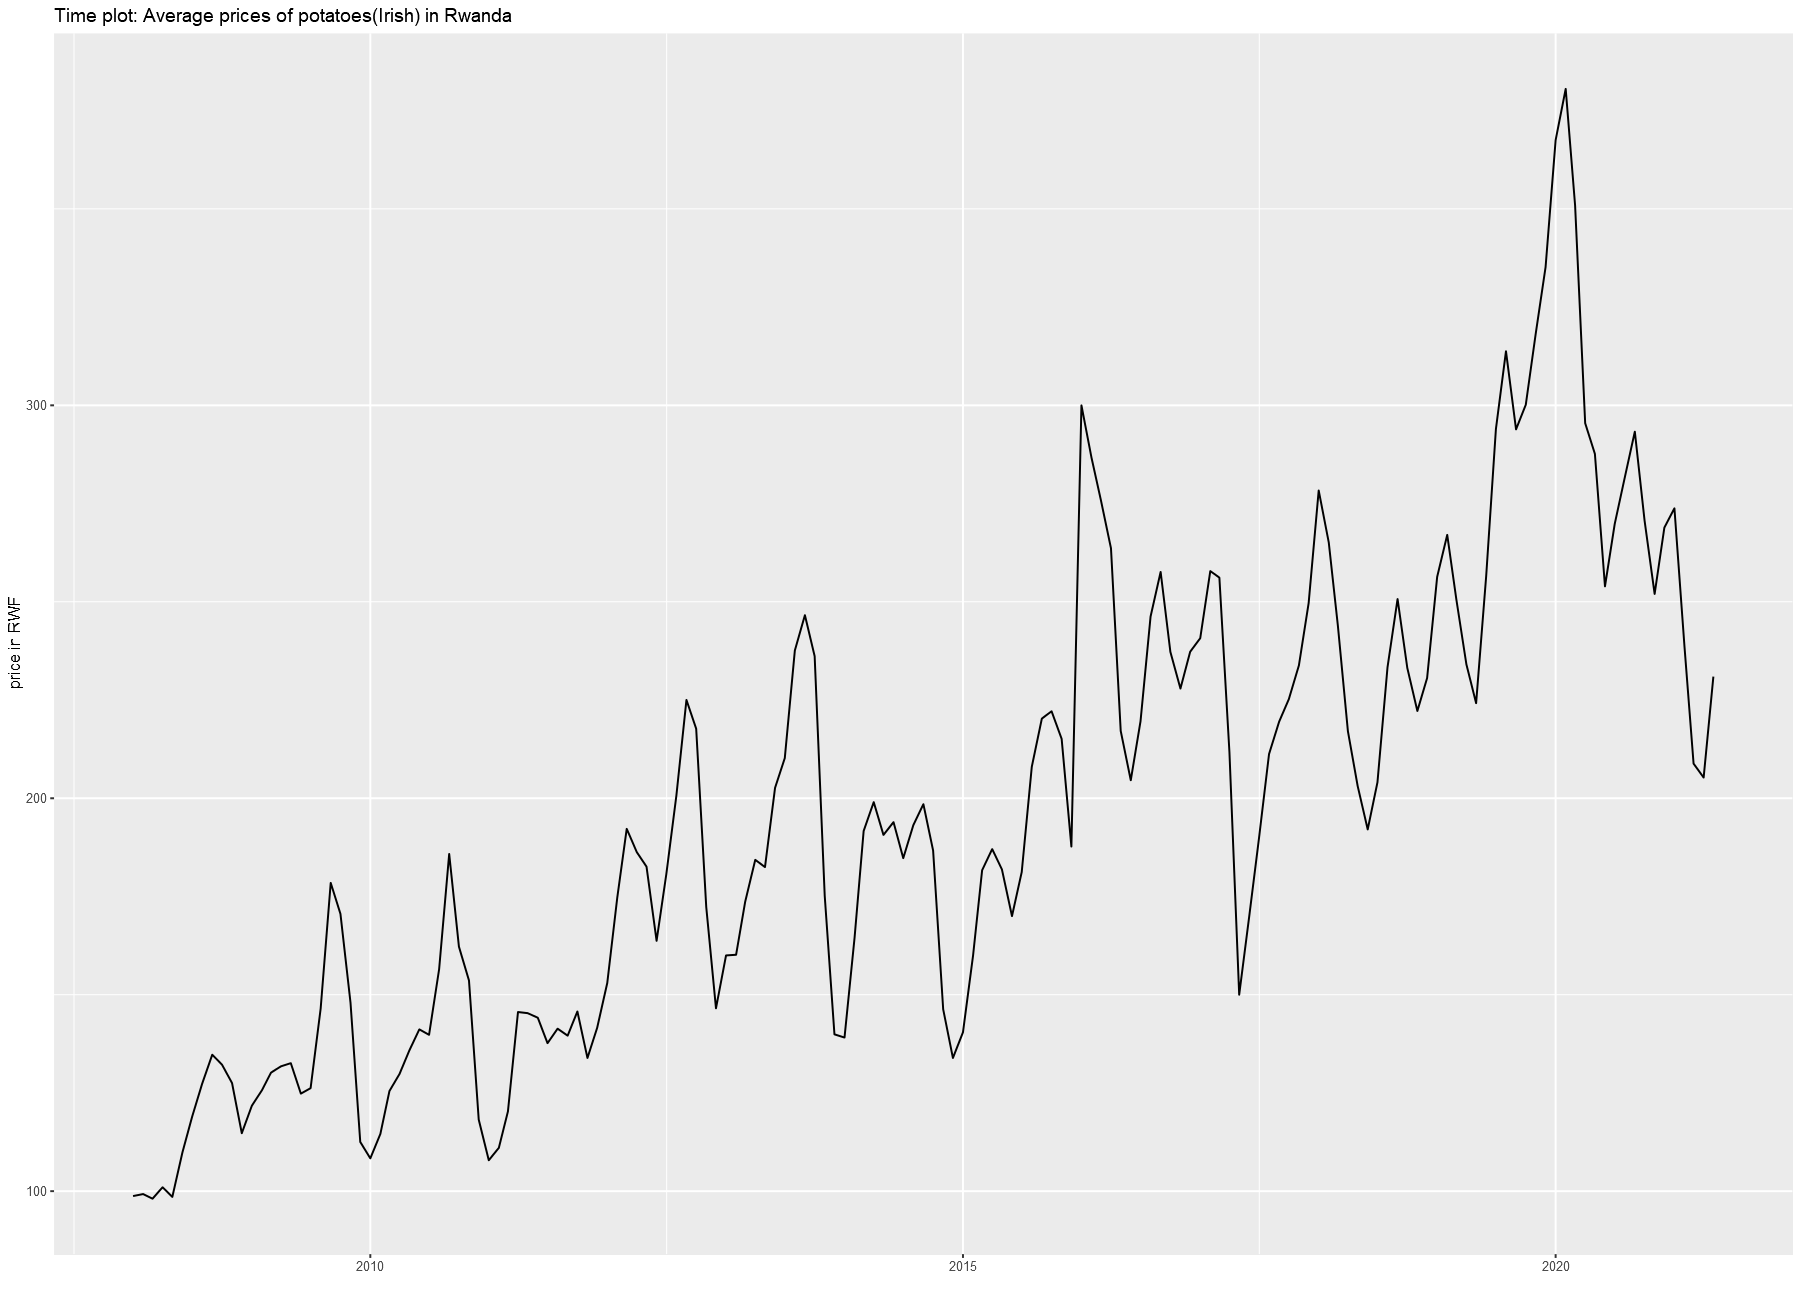

In [383]:
autoplot(potato_timeseries_data)+ggtitle("Time plot: Average prices of potatoes(Irish) in Rwanda")+ylab("price in RWF")

The graph shows that the average price of potatoes has an increasing trend. Due to the trend, it is difficult to analyze the seasonal pattern of data; therefore, I need to remove the trend and make the graph stationary to do seasonal analysis.


To remove the trend, I will look at the change of potato prices instead of potato prices themselves.

In [384]:
#Using diff() fuction to get the change differences data. 
potato_price_change <- diff(potato_timeseries_data)

Now I will plot a line graph that shows monthly price fluctuation rate.

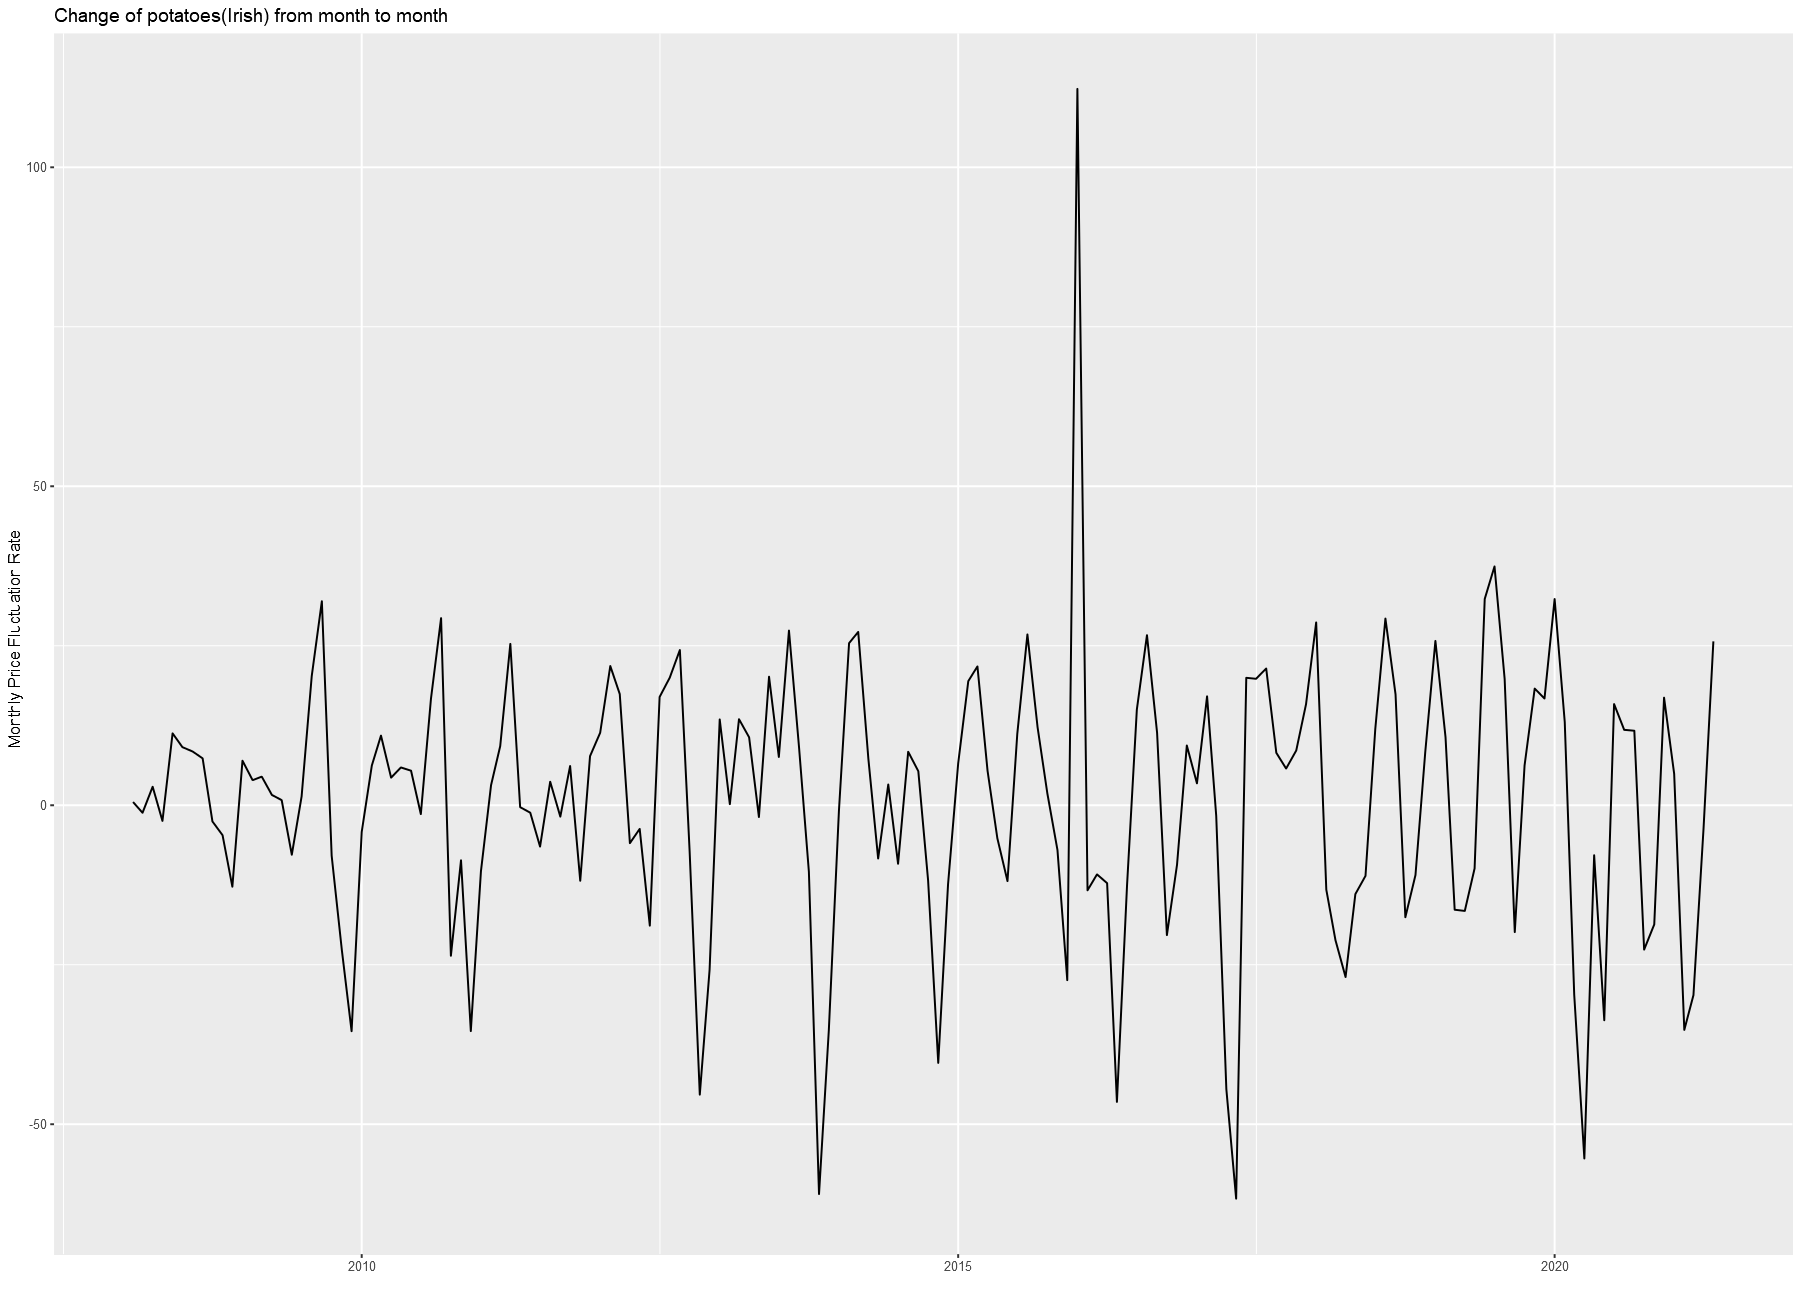

In [385]:
autoplot(potato_price_change)+ggtitle("Change of potatoes(Irish) from month to month")+ylab("Monthly Price Fluctuation Rate")

#### 4.3.4. Seasonality Analysis<a class="anchor" id="4.3.4.Seasonality_Analysis"></a>

Since the plot appear trend-stationary, I will use **ggseasonplot()** function to look at the seasonality and identify whether the potato prices change similarly every year in the same season.

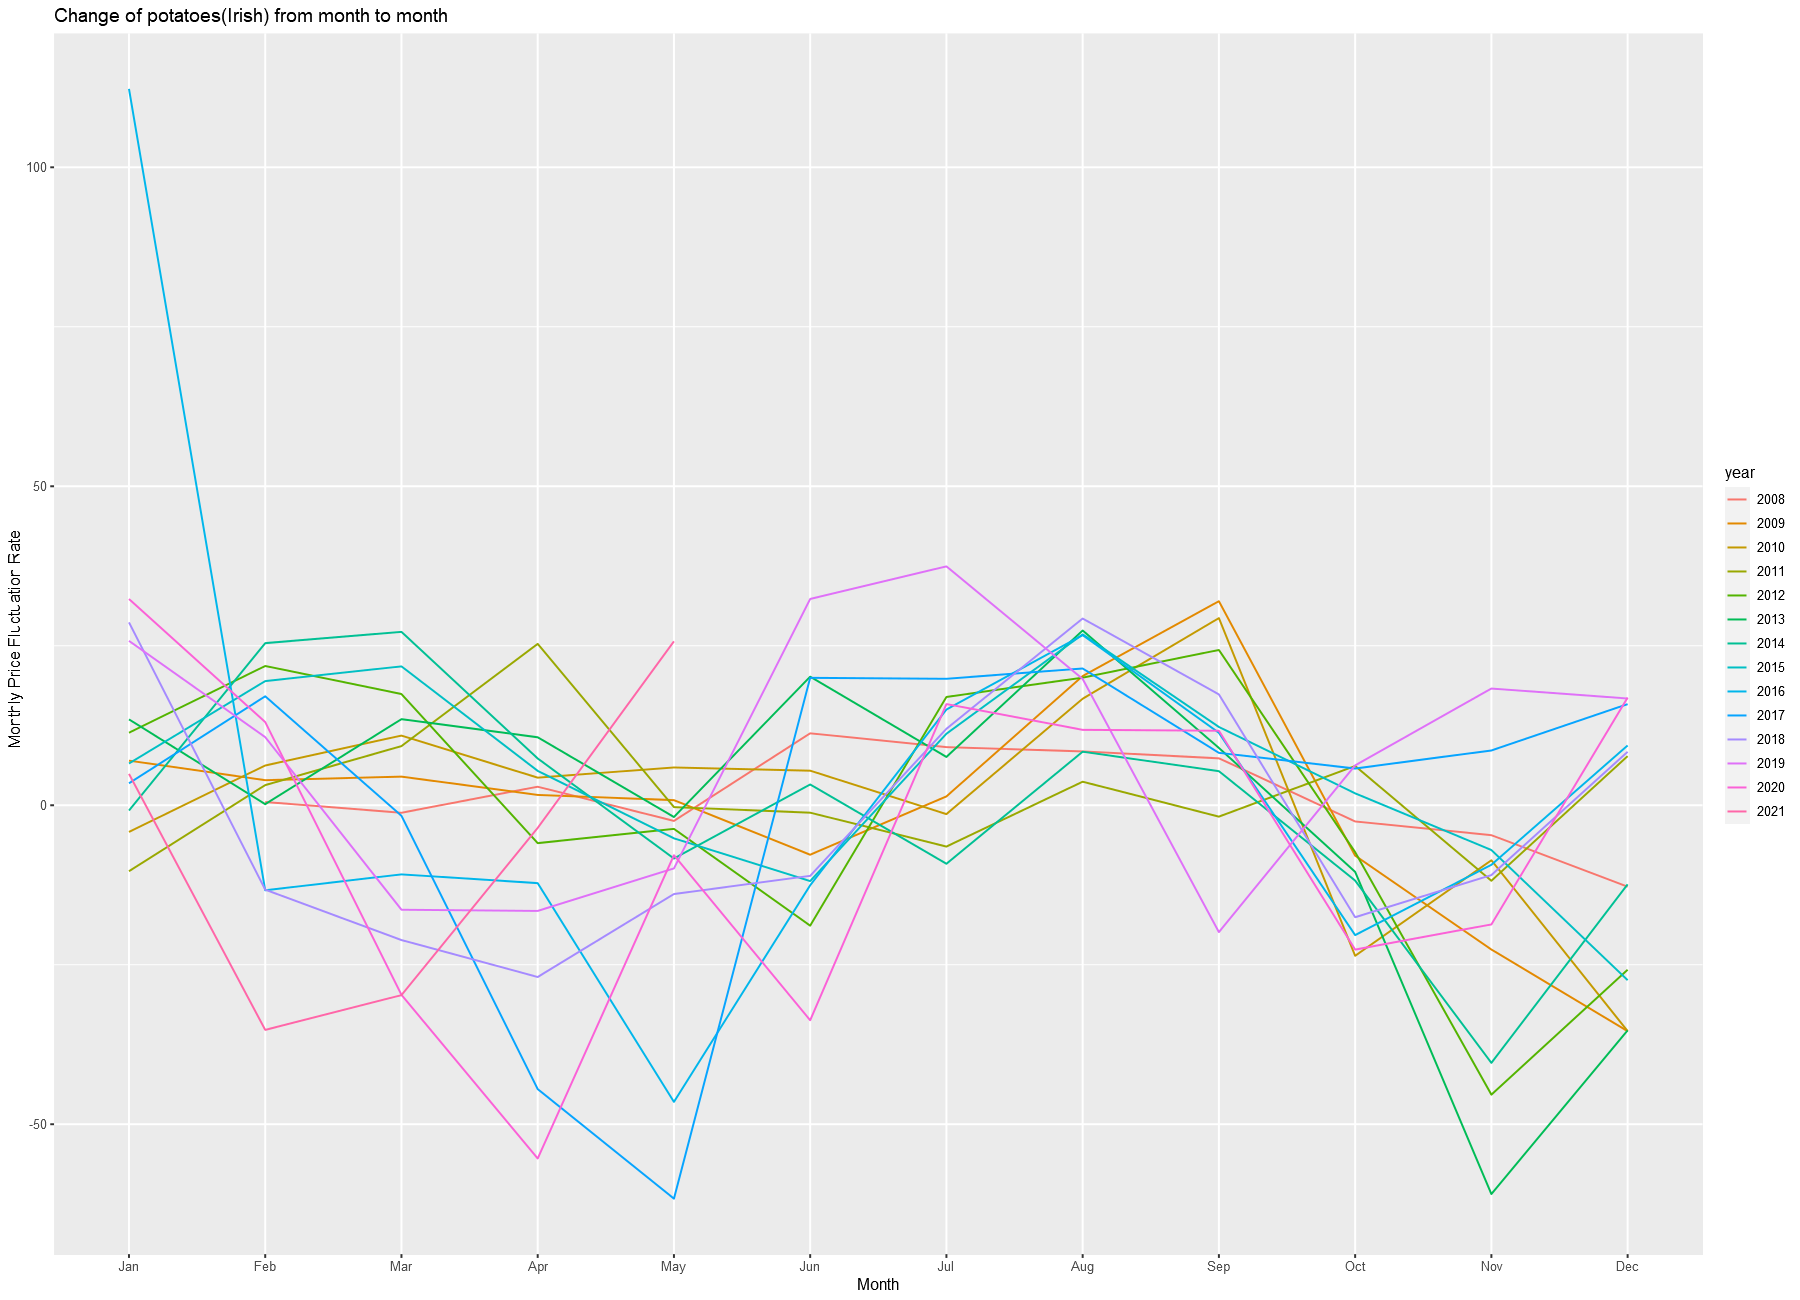

In [386]:
ggseasonplot(potato_price_change)+ggtitle("Change of potatoes(Irish) from month to month")+ylab("Monthly Price Fluctuation Rate")

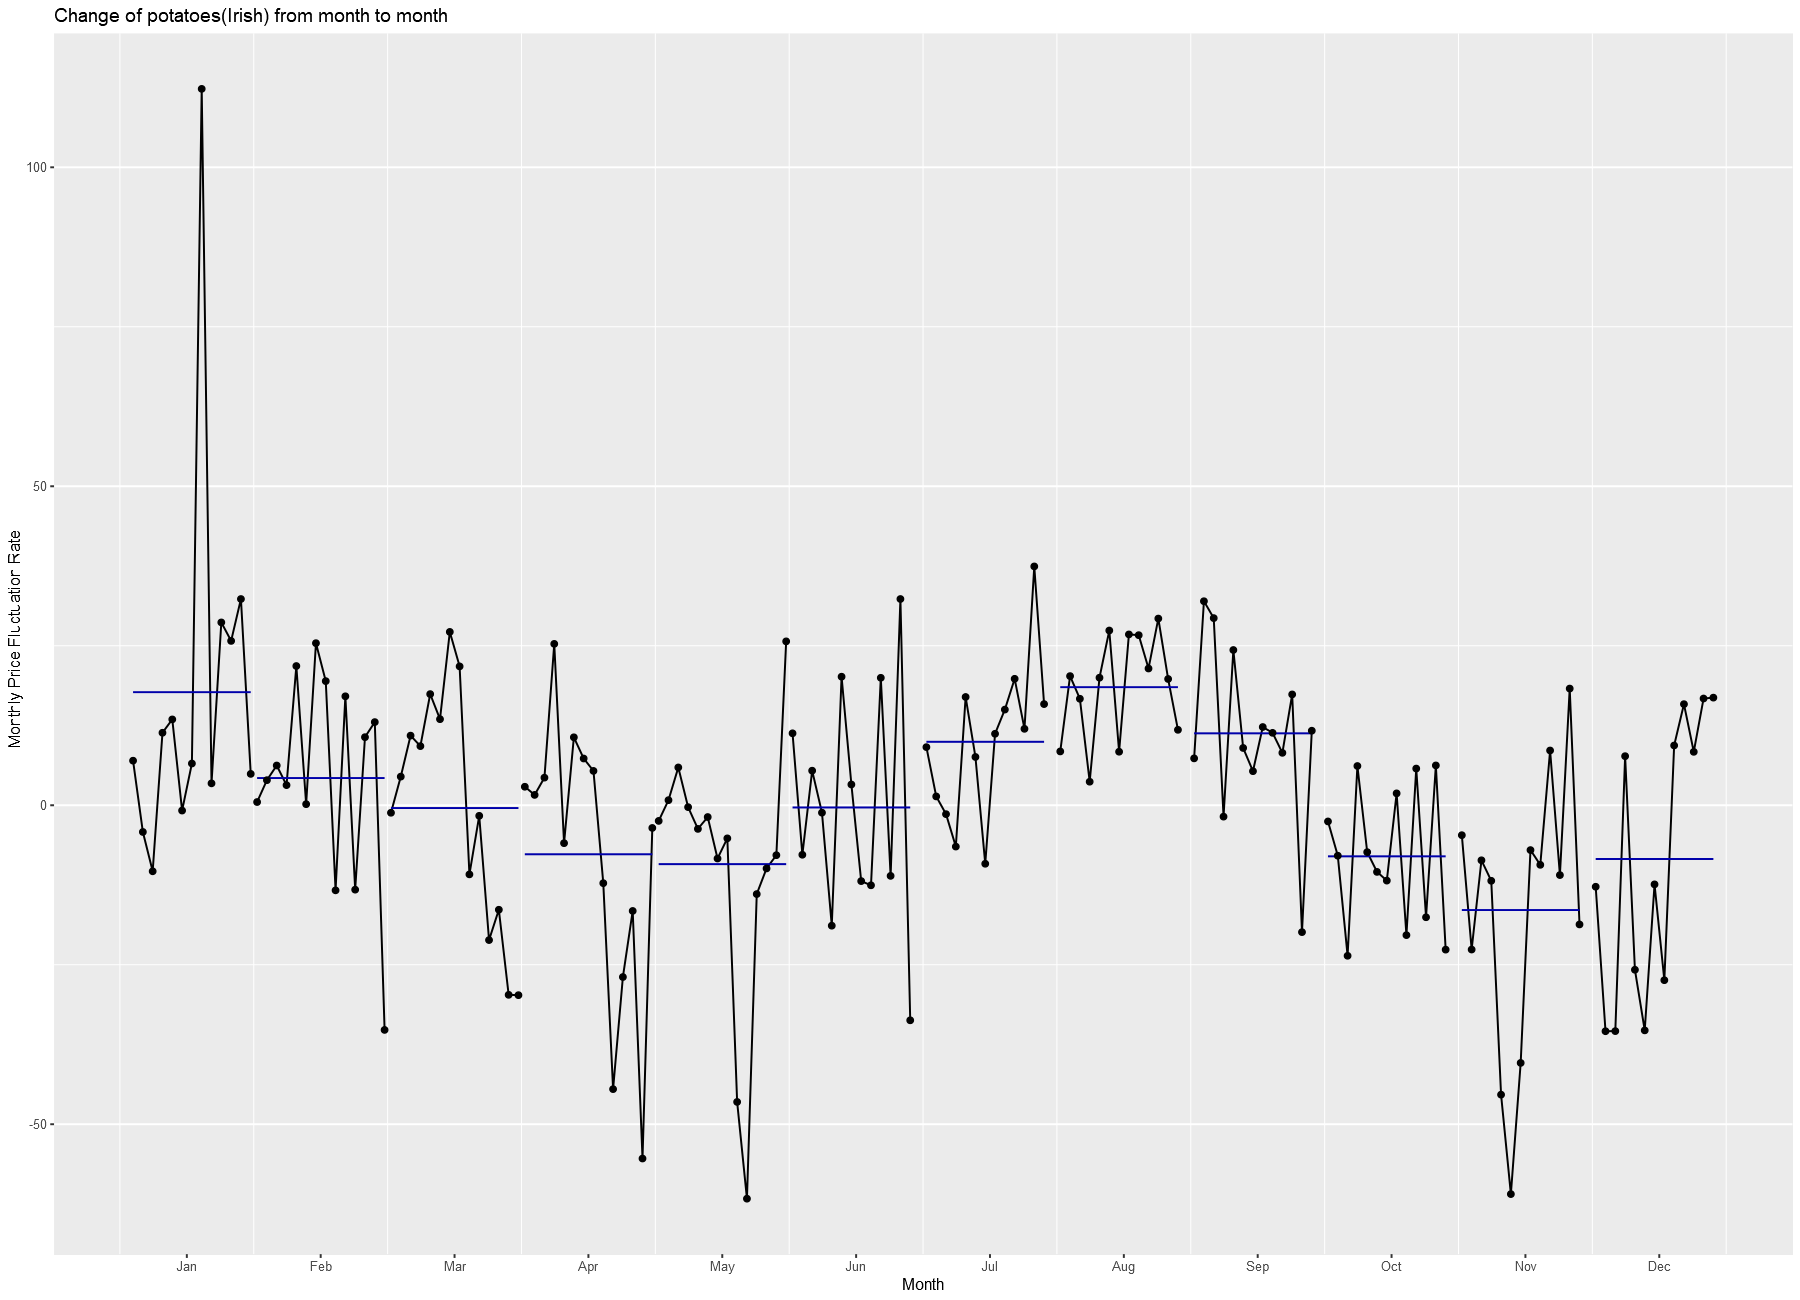

In [421]:
ggsubseriesplot(potato_price_change, aes(label=date))+
ggtitle("Change of potatoes(Irish) from month to month")+
ylab("Monthly Price Fluctuation Rate")+
geom_point()

##### Findings:

1. The potato prices are expensive on winter and summer(January, July, August, September) and cheap during spring(April, May) and fall(October, November)


2. There seem to be not many differences in the price in terms of seasons, so the effect seasonality might be less than I expected.


3. There is an outlier in January.

### 4.4. Potatoes (Irish) data distribution<a class="anchor" id="4.4.Potatoes_data_distribution"></a>

#### 4.4.1. Potatoes (Irish) price difference by admin1(province)<a class="anchor" id="4.4.2.Potatoes_price_difference_by_province"></a>

Now I will analyze the price differences of  Potatoes (Irish) in different regions.

According to the first bar plot, the Potato prices are not much different between regions. To further analyze the relationship between prices and provinces, the thrid plot will analyze the prices of 'Potatoes (Irish)' in different provinces.

First, I will create a new dataset that includes both admin1(province) and admin2(city).

In [389]:
potato_average_price_by_province_and_city = potato %>% 
    group_by(date,admin1, admin2) %>% 
    select(date, admin1,admin2, price) %>%
    summarise(averagePrice = mean(price)) %>% 
mutate(year = year(date),month = month(date), day = day(date))

`summarise()` has grouped output by 'date', 'admin1'. You can override using the `.groups` argument.



I will use the new dataset to plot a box plot representing average prie distribution in different regions.

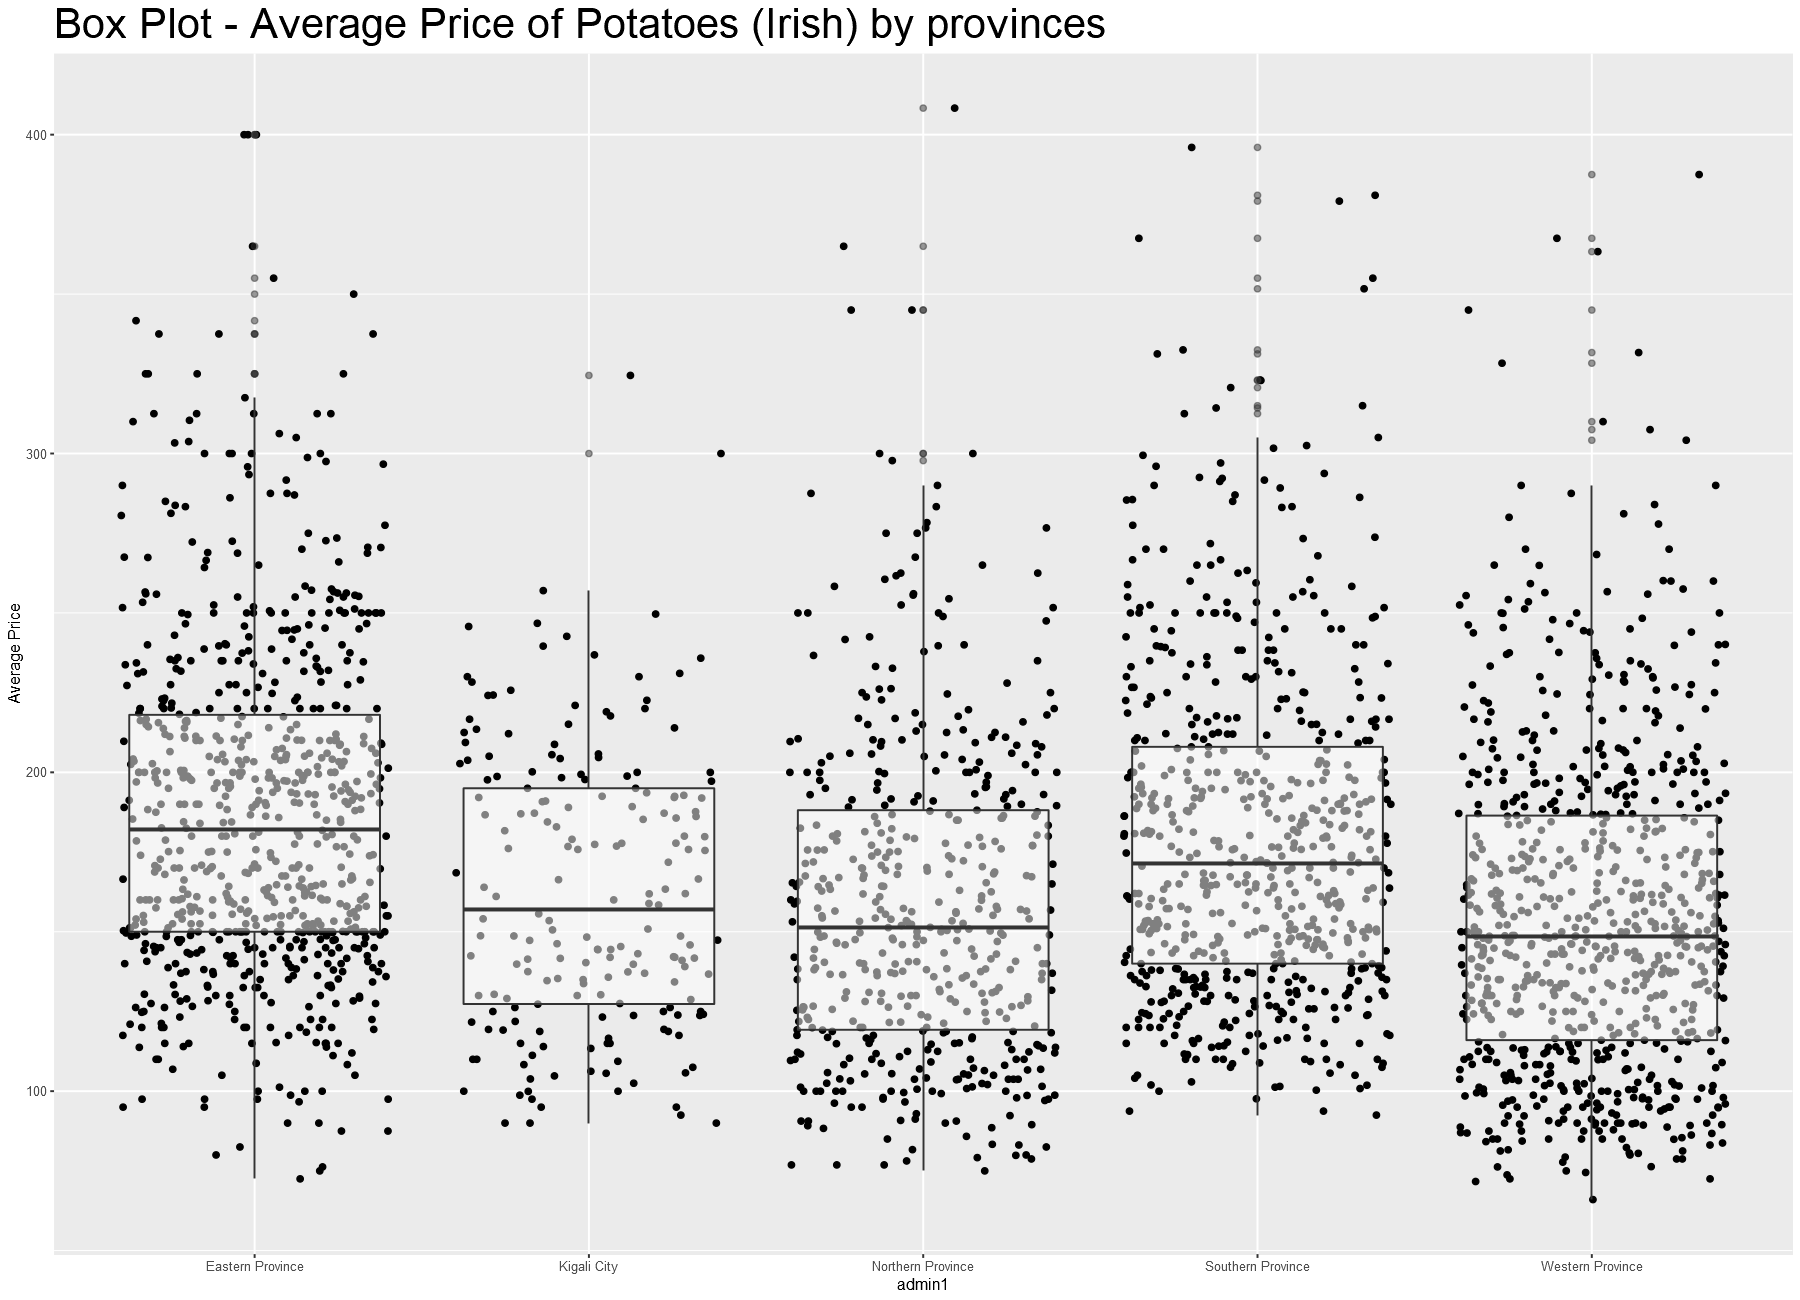

In [390]:
ggplot(potato_average_price_by_province_and_city, aes(potato_average_price_by_province_and_city$admin1, potato_average_price_by_province_and_city$averagePrice))+ 
#x-axis: province, y-axis: Average price of potato
geom_jitter(col = "black") + 
geom_boxplot(alpha = .5, aes(colour = potato_average_price_by_province_and_city$year))+ 
#I'm setting alpha=0.5 to make the bar transparent, thus allowing to see the data distribution behind the bar.
theme(plot.title = element_text(size = 30))+
labs(x = "admin1", y ="Average Price", title = "Box Plot - Average Price of Potatoes (Irish) by provinces")
options(repr.plot.width= 28, repr.plot.height=20)

#### Findings:

1. Kigali City tends to have a lower price range of Potatoes (Irish) compared to other regions. Probably because Kigali City is the capital city, it would have the most active logistic infrastructure, therefore, has low-priced commodities.


2. Eastern Province has a high price range of Potatoes (Irish). This implies that Eastern Province could have a supply-chain issue.


3. Although Northern Province has a relatively low price range of Potatoes (Irish), there are a few outliers.

#### 4.4.2. Outlier analysis<a class="anchor" id="4.4.3.Outlier_analysis"></a>

To find out outliers I will first define the outlier.


Definition of outliers: Values that are greater than the 75th percentile value + 1.5 times the inter quartile range or lesser than the 25th percentile value - 1.5 times the inter quartile range.

source: https://www.rdocumentation.org/packages/StatMeasures/versions/1.0/topics/outliers

In [391]:
#Based on the above value, I define the outlier as a value greater than 75th percentile value + 1.5 times the inter quartile range, lesser than 25th percentile value - 1.5 times the inter quartile range.
is_outlier <- function(x) {
  return(x < quantile(x, 0.25) - 1.5 * IQR(x) | x > quantile(x, 0.75) + 1.5 * IQR(x))}

Using the 'is_outlier' functon, I can find out outliers from the dataset.

In [392]:
df_outlier <-potato_average_price_by_province_and_city[is_outlier(potato_average_price_by_province_and_city$averagePrice),]
df_outlier
#'df_outlier' is a list of outliers. There are 57 outliers in total.

date,admin1,admin2,averagePrice,year,month,day
<date>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>
2013-08-15,Kigali City,Kicukiro,324.5000,2013,8,15
2016-10-15,Eastern Province,Gatsibo,305.0000,2016,10,15
2018-08-15,Eastern Province,Kirehe,325.0000,2018,8,15
2018-09-15,Eastern Province,Kirehe,341.6667,2018,9,15
2019-10-15,Eastern Province,Kirehe,325.0000,2019,10,15
2020-02-15,Eastern Province,Kirehe,310.4175,2020,2,15
2020-02-15,Southern Province,Gisagara,331.2500,2020,2,15
2020-02-15,Western Province,Karongi,307.5000,2020,2,15
2020-03-15,Eastern Province,Gatsibo,312.5000,2020,3,15


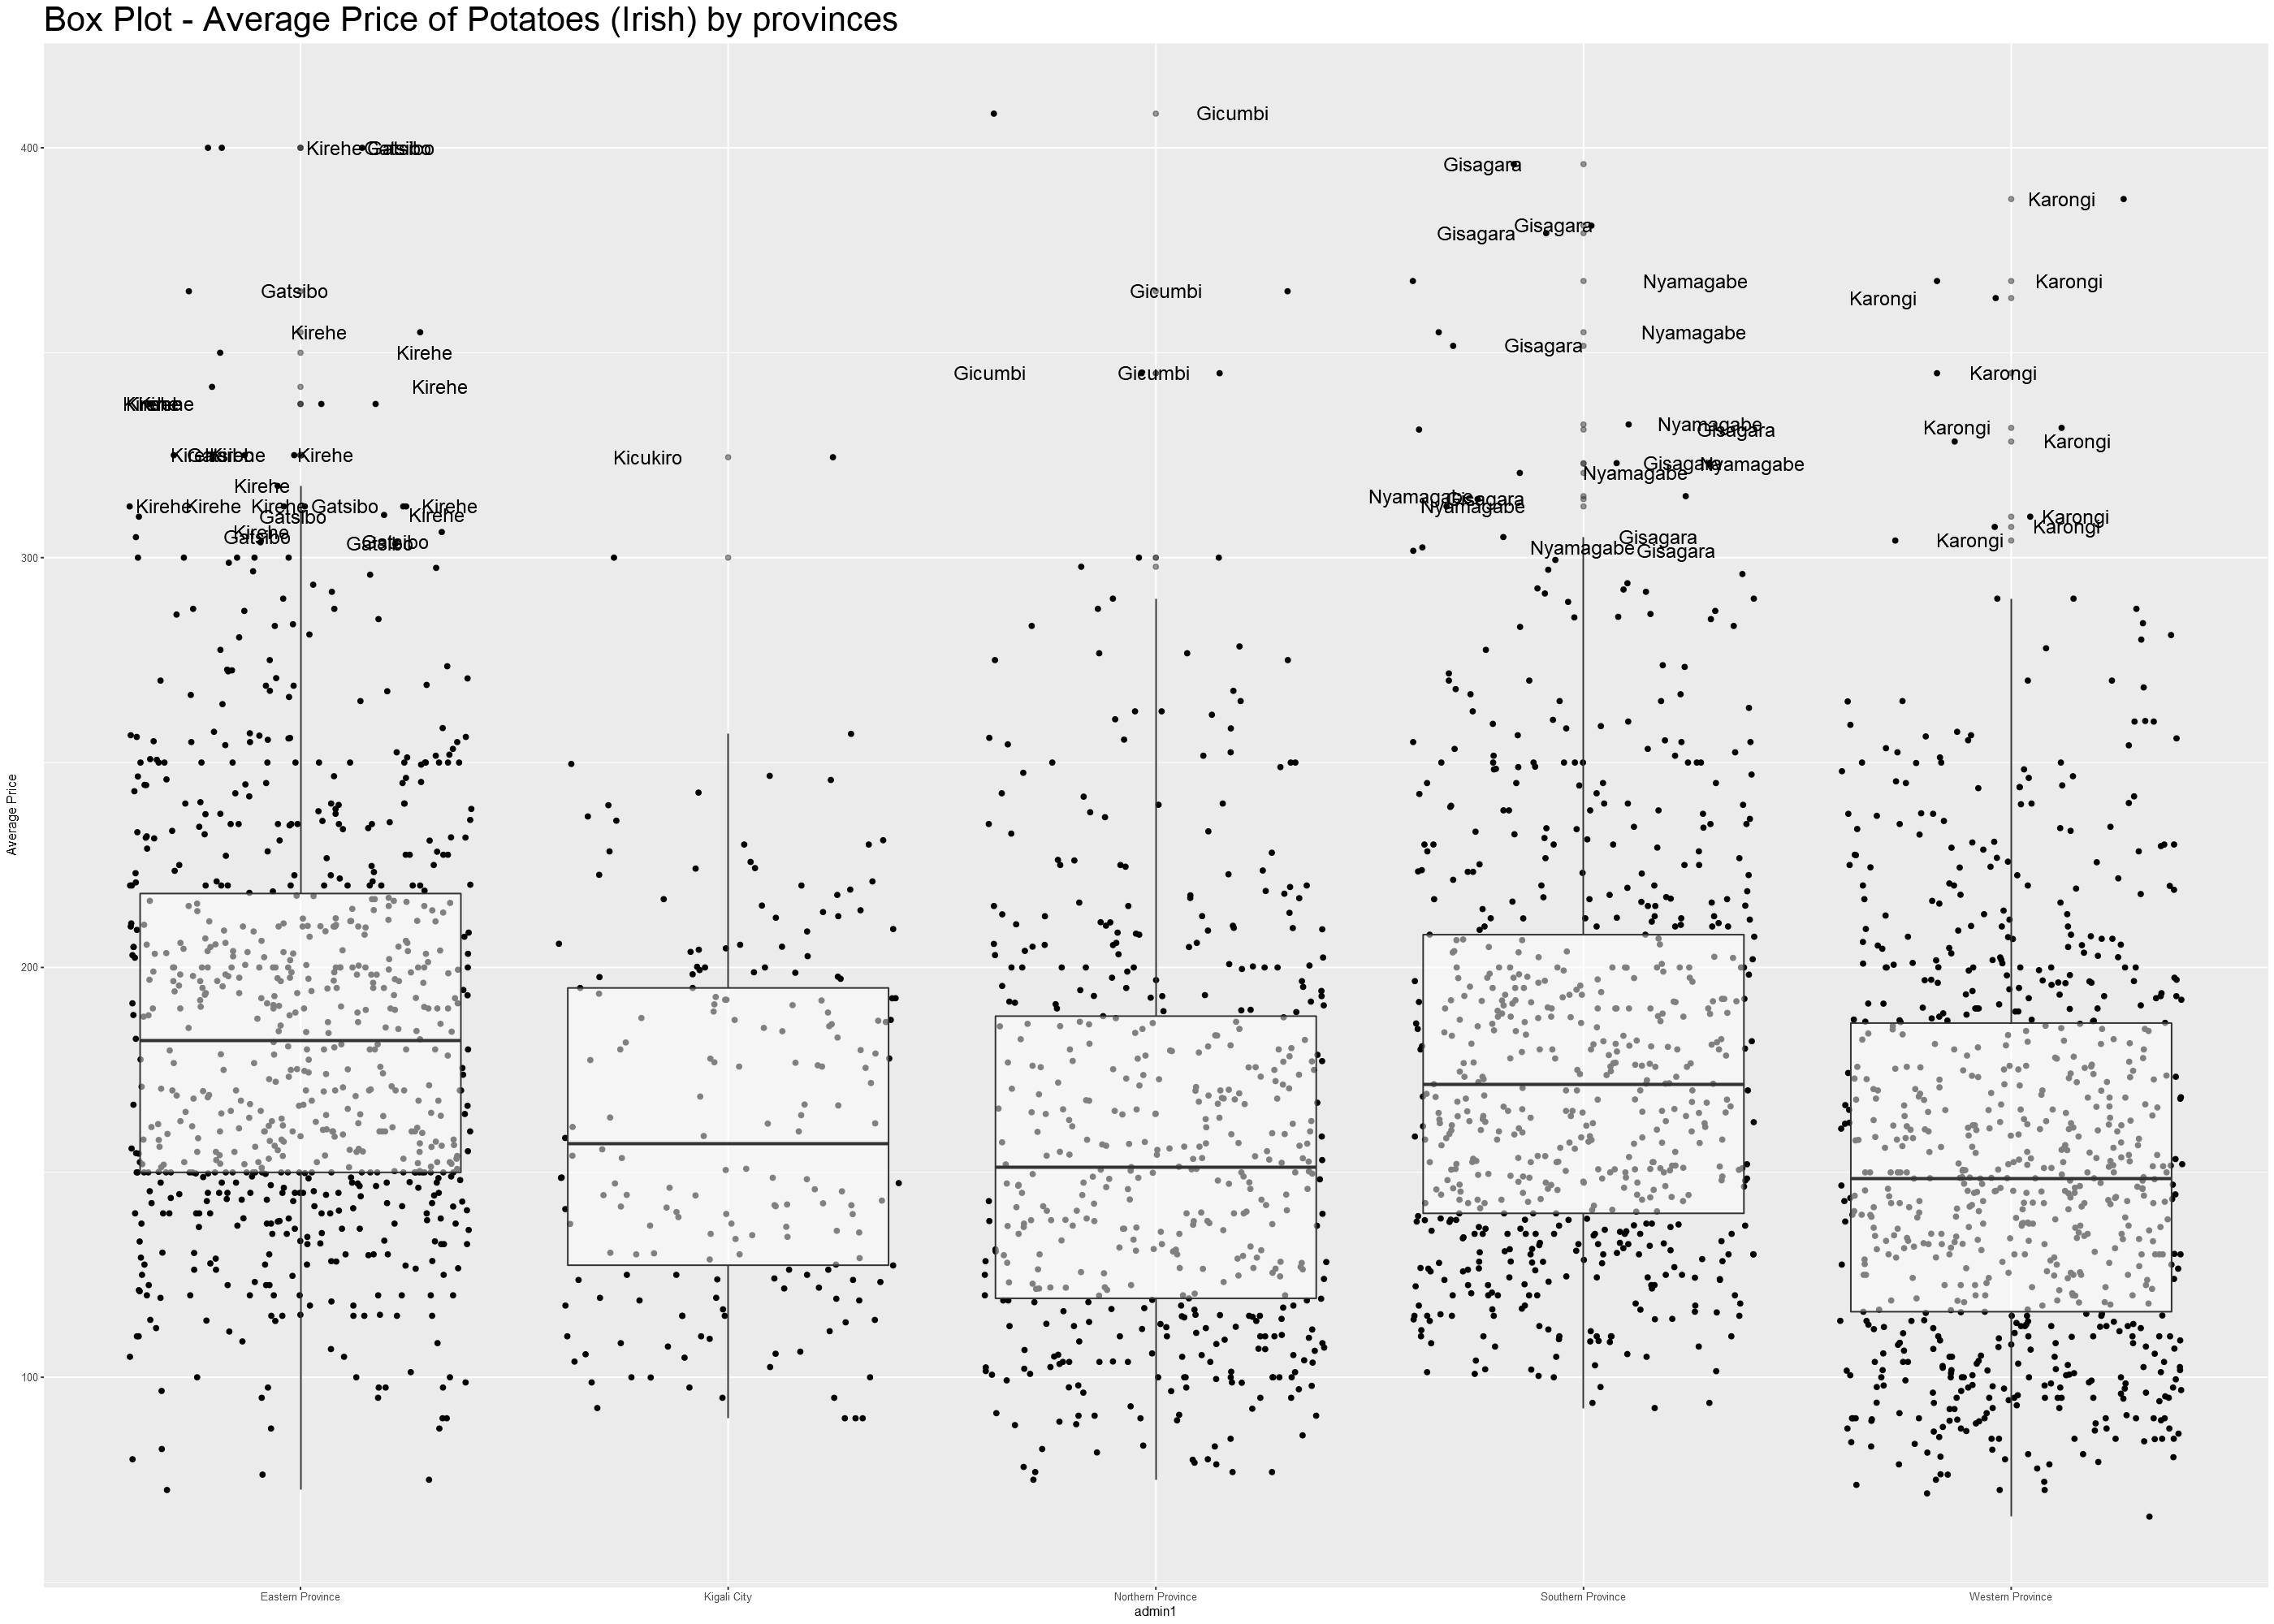

In [393]:
ggplot(potato_average_price_by_province_and_city, aes(potato_average_price_by_province_and_city$admin1, potato_average_price_by_province_and_city$averagePrice))+ 
#x-axis: province, y-axis: Average price of potato
geom_jitter(col = "black") + 
geom_boxplot(alpha = .5, aes(colour = potato_average_price_by_province_and_city$year))+ 
#I'm setting alpha=0.5 to make the bar transparent, thus allowing to see the data distribution behind the bar.
theme(plot.title = element_text(size = 30))+
labs(x = "admin1", y ="Average Price", title = "Box Plot - Average Price of Potatoes (Irish) by provinces")+
geom_text(data = df_outlier, mapping = aes(x=admin1, y=averagePrice, label = admin2), col = "black", size = 6, position = position_jitter(seed = 1))
#I'm adding geom_text() alpha=0.5 to label outliers on the graph.

#### Findings:

1. Although most cities in Northern Province have relatively low-priced Potatoes (Irish), potatoes in Gicumbi are abnormally expensive, which implies that a certain factor in Gicumbi is negatively affecting the potato supply chain.


2. The number of outliers in Kigali City is lower compared to that of other provinces. Since Kigali City is the capital city with probably the most well-established logistics infrastructure, the potato prices would be must less volatile than other cities.

#### 4.4.3. Potatoes (Irish) price difference by admin2(city)<a class="anchor" id="4.4.4.Potatoes_price_difference_by_city"></a>

In the previous bar plot, I looked at the price data in different provinces. For further analysis, I will analyze how different cities(admin2) have different price ranges for Potatoes (Irish).

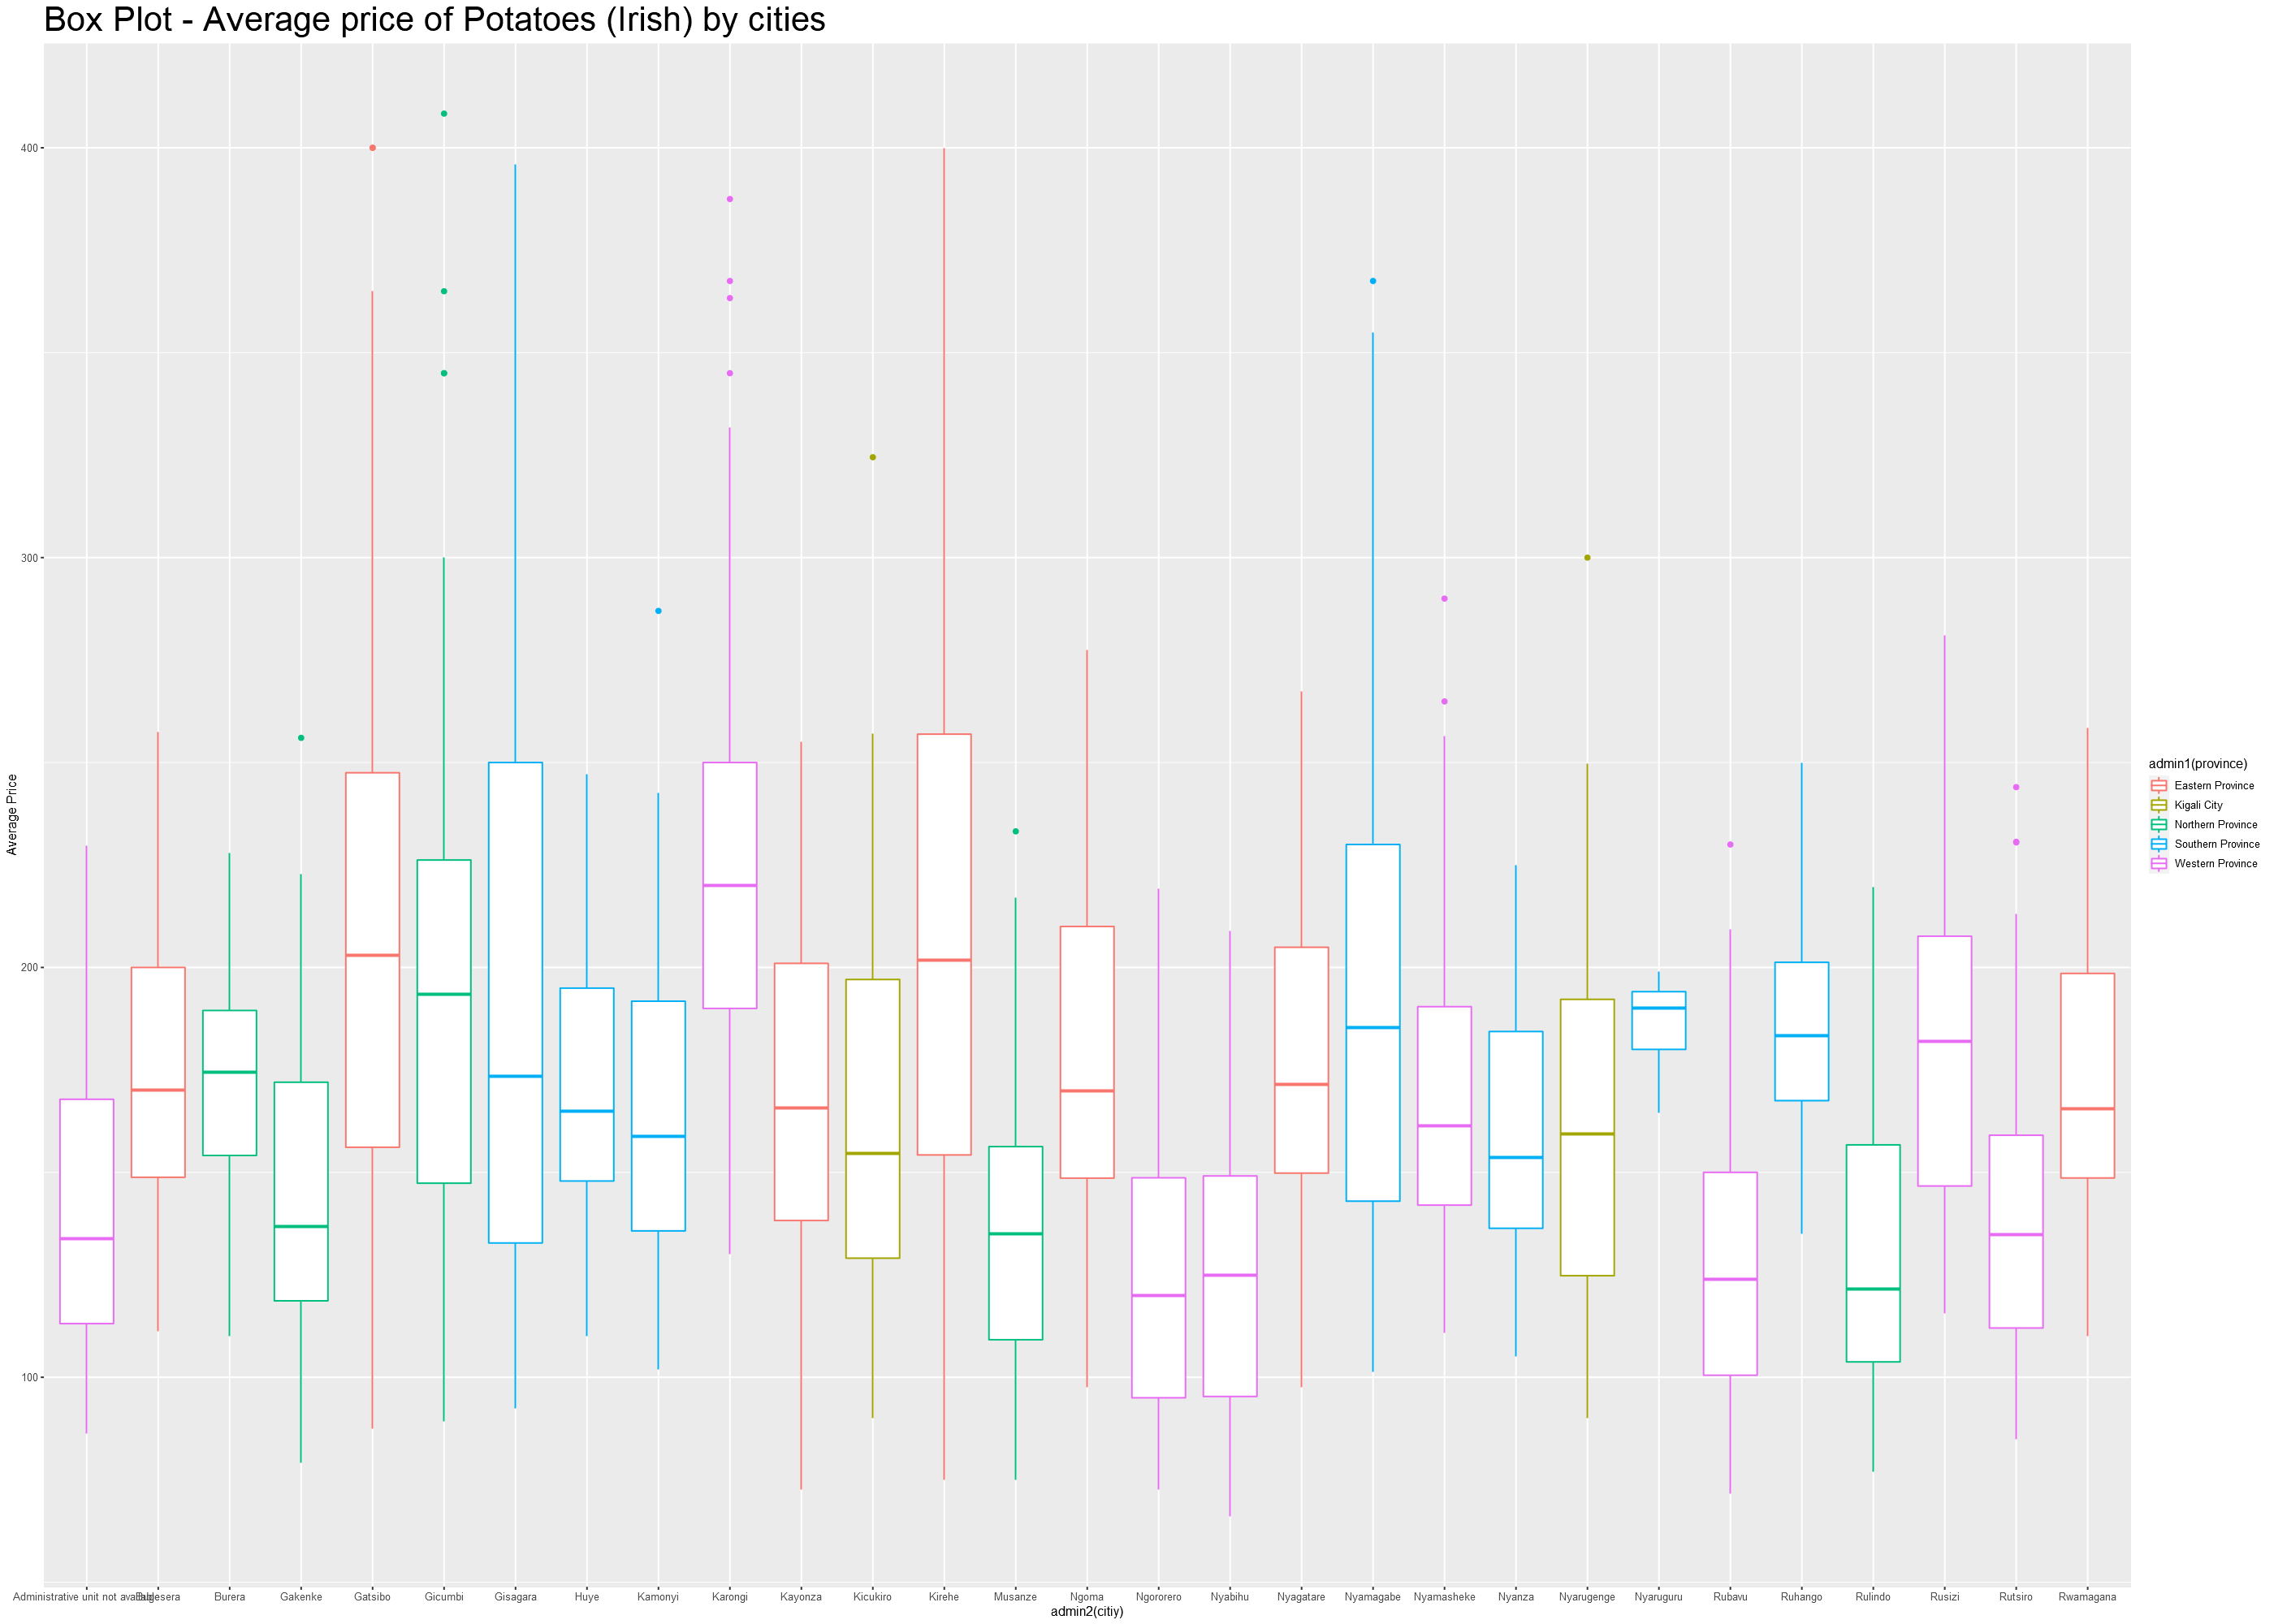

In [394]:
ggplot(potato_average_price_by_province_and_city, aes(potato_average_price_by_province_and_city$admin2, potato_average_price_by_province_and_city$averagePrice))+
    geom_boxplot(aes(colour = potato_average_price_by_province_and_city$admin1))+
# I will use color to distinguish what cities belong to a certain province.
    theme(plot.title = element_text(size = 30))+
    labs(colour = "admin1(province)", x = "admin2(citiy)", y ="Average Price", title = "Box Plot - Average price of Potatoes (Irish) by cities")

As previously observed, cities in Southern and Eastern Provinces tend to have a higher price ranges.


For further analysis, let's see how potato prices in different cities varied from 2000 to 2022. 

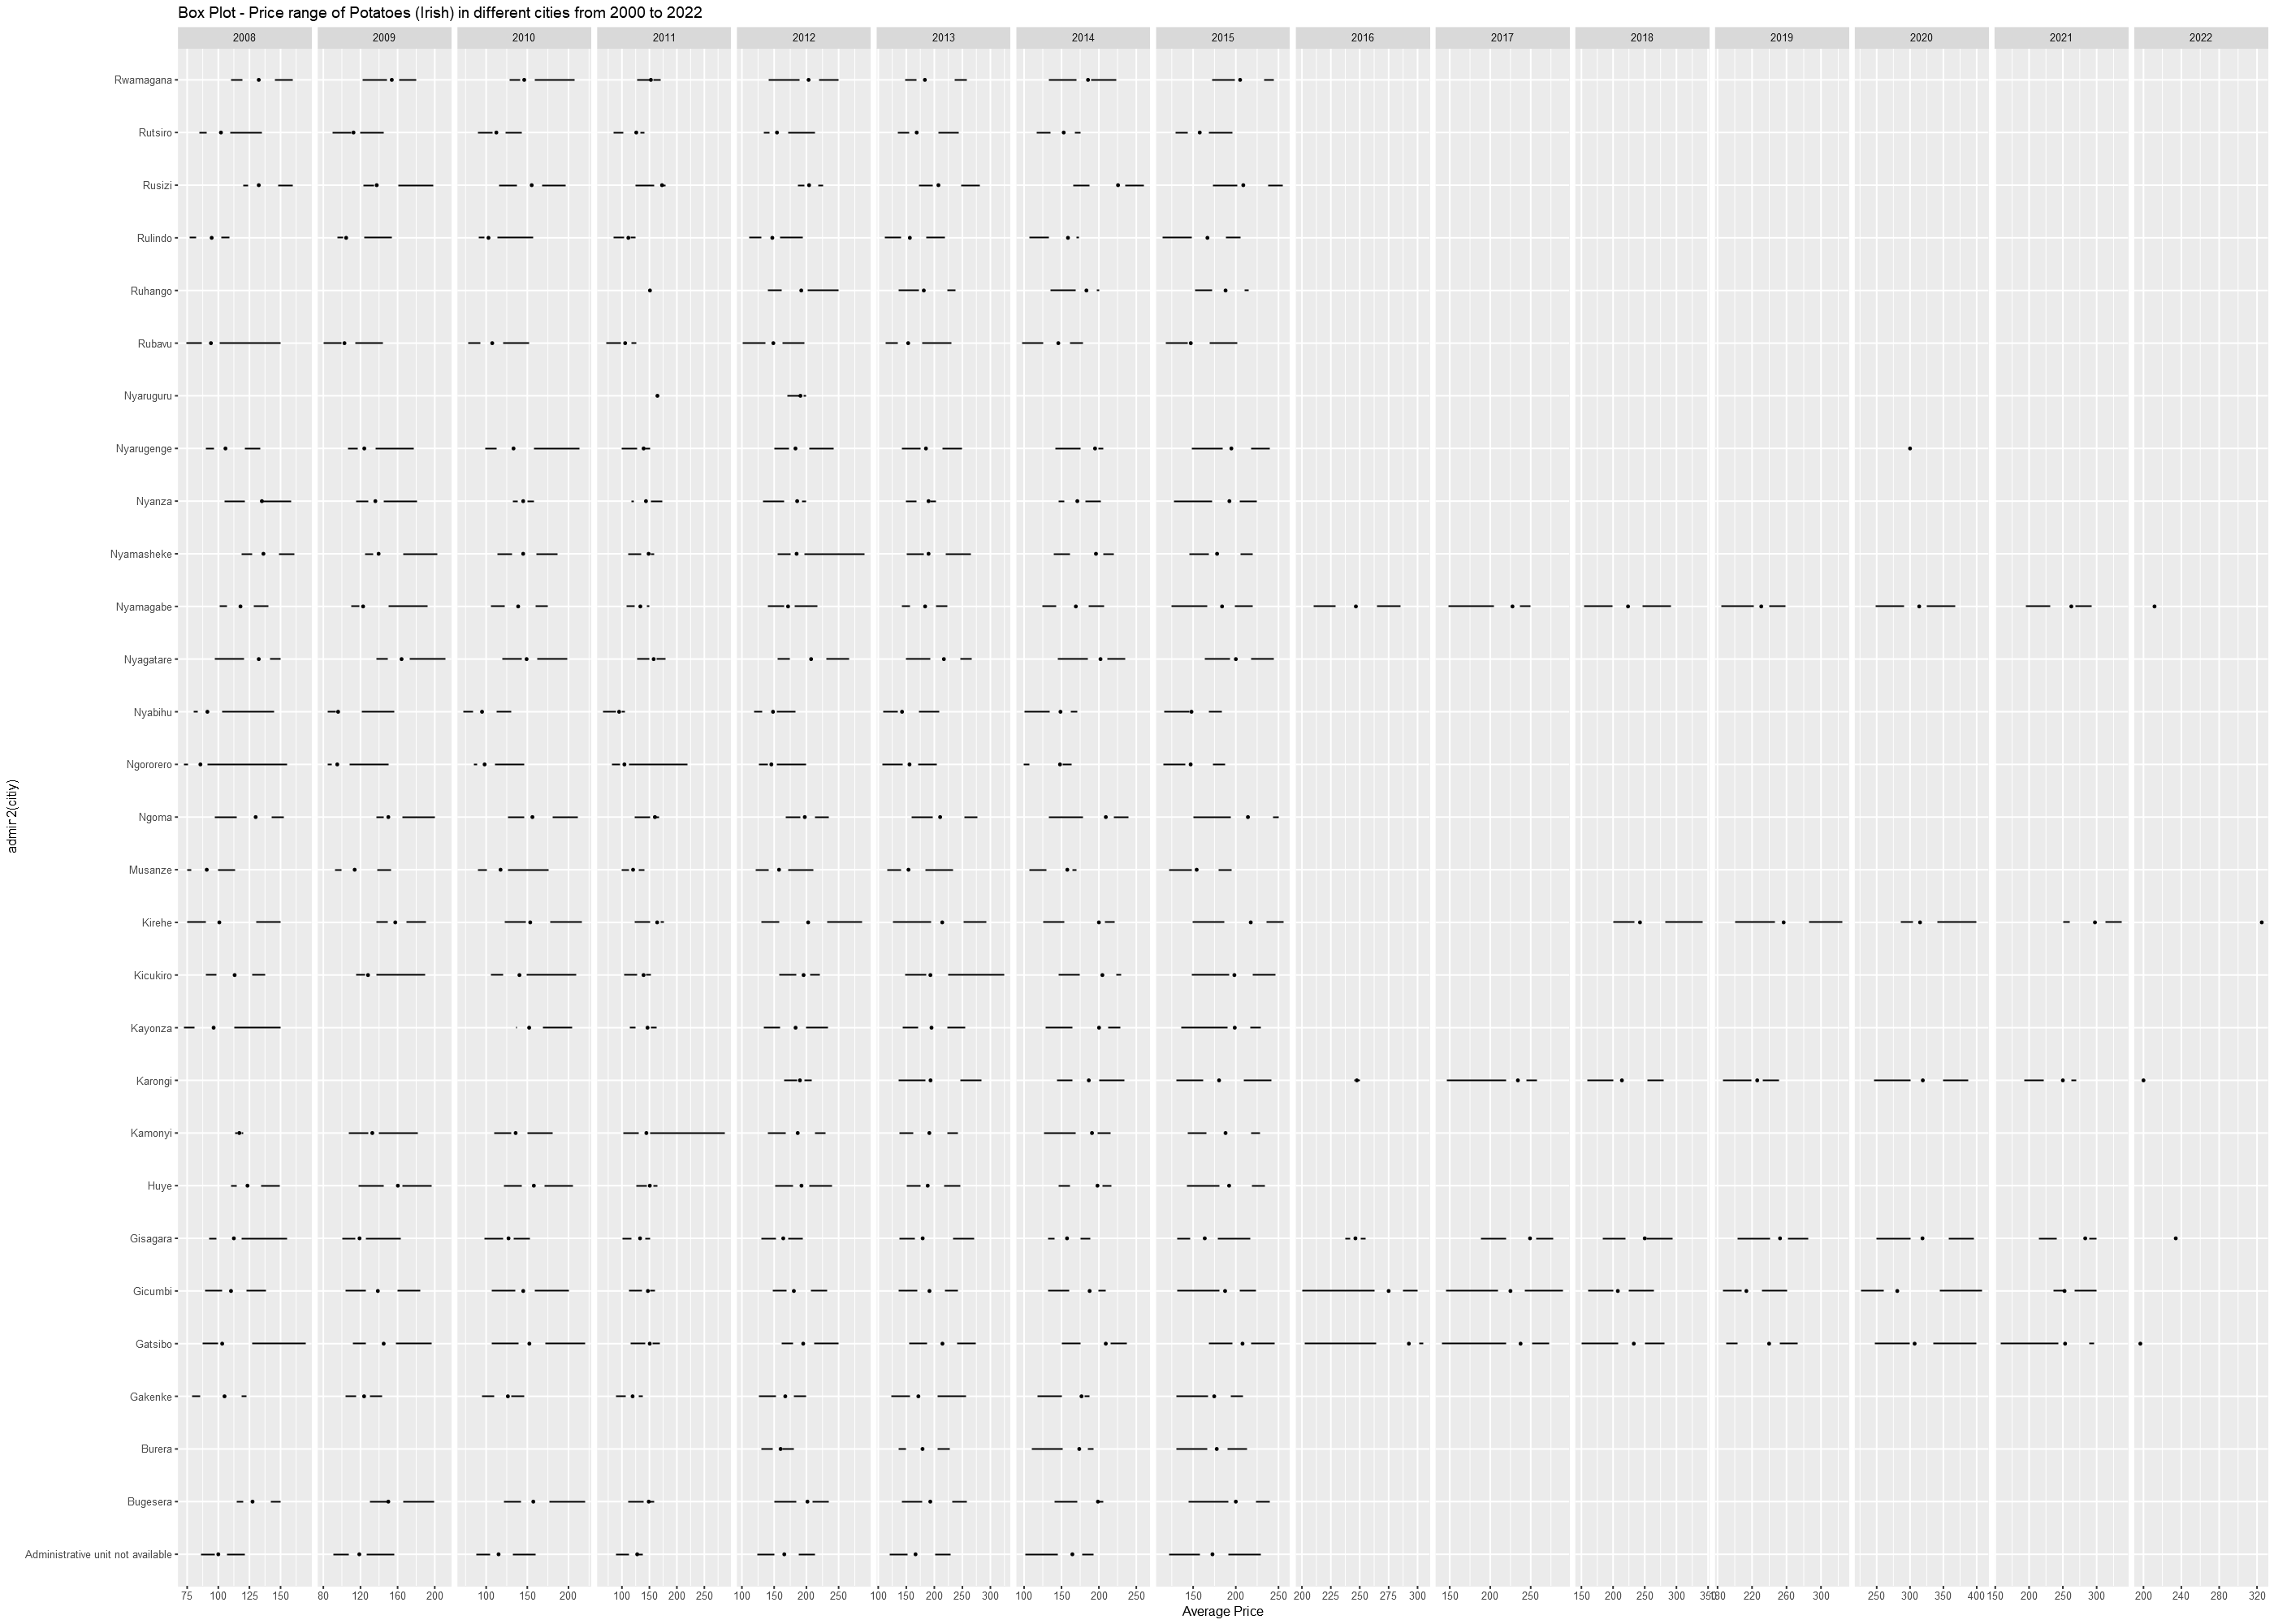

In [395]:
ggplot(potato_average_price_by_province_and_city, aes(x=admin2, y=averagePrice)) +
geom_tufteboxplot() + 
    facet_grid(.~potato_average_price_by_province_and_city$year, scales="free") +
  labs( x = "admin2(citiy)", y ="Average Price", title = "Box Plot - Price range of Potatoes (Irish) in different cities from 2000 to 2022")+
  coord_flip() 

We could see that price data have not been recorded in most of the cities from 2016 to 2022.

## 5. Conclusion <a class="anchor" id="4.Conclusion"></a>

Based on the findings from above data analysis, I made following deductions:


1. In Rwanda, potato prices are influenced by seasons. Therefore, the WFP would be able to make a maximum social impact by buying the potatoes during summer and disseminating the food assistance in winter.


2. Although there are some price differences between regions, the potato price changes are mostly in-aligned in all regions, implying that the transportation infrastructure in Rwanda is sufficient to facilitate the flow of logistics. 


3. The city of Gicumbi has a refugee camp named Gihembe Refugee Camp which holds over 14,680 refugees(according to the UNHCR's 2015 data). Since refugee inflow means an increase in food consumption demand, unusally high potato prices in Gicumbi are maybe due to the sudden increased demand for potatoes caused by the refugee influx.